#   [Cборный проект](#back)
# "Выявление определяющих успешность игры закономерностей"
<a id='back'></a>

#### Описание проекта 

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволяет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

 *Данные за 2016 год могут быть неполными. 

#### План работы 
Шаг 1. Откроем файл с данными и изучим общую информацию. Путь к файлу: /datasets/games.csv.

Шаг 2. Подготовим данные: 
- Приведем названия столбцов к нижнему регистру. 
- Преобразуем данные в нужные типы. 
- При необходимости - обработаем пропуски. Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. 
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Шаг 3. Проведем исследовательский анализ данных:
- Сколько игр выпускалось в разные годы.
- Как менялись продажи по платформам. 
- Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
- Попробуем найти характерный срок жизни платформы. В дальнейшей работе будем учитывать только актуальные данные.
- Найдем лидирующие по продажам платформы Выберем несколько потенциально прибыльных платформ.  
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
- Посмотрим на общее распределение игр по жанрам. 

Шаг 4. Составим портрет пользователя каждого региона. Определим для пользователя каждого региона (NA, EU, JP): 
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5).  
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверим гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports  разные.

Шаг 6. Напишем общий вывод



#   [Оглавление](#back)
<a id='back'></a>
- [Введение](#start)
- [Общая информация и предобработка данных](#info)
- [Подготовка данных](#duplicated)
- [Исследование данных](#analit)
- [Изучение региональной специфики](#country)
- [Гипотезы и проверка](#hypothesis)
- [Выводы](#end)


#  [Общая информация и предобработка данных](#back)
<a id='info'></a>

In [1]:
#импортируем необхоимые библиотеки
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


#cразу сделаем графики чуть больше и красивее
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7 
sns.set_style("darkgrid")


In [2]:
#сохраним данные в df и посмотрим основную информацию
df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Отметим, что к-во пропусков в стобцах с оценками и рейтингом больше, чем в остальных. Тип данных в столбце с оценкой пользователей нужно поменять

Оценим первые 10 строк таблицы:

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Сразу отметим, что названия столбцов следует привести к удобному виду, в столбце с годами выхода нужно сменить тип данных, в столбцах с оценками и рейтингом сразу видны пропущенные значения.

#  [Подготовка данных](#back)
<a id='duplicated'></a>

Приведем все названия столбоцов к единному, удобному виду, сделаем все буквы в названиях строчными.

In [4]:
df = df.rename(str.lower, axis='columns')

Приведем к нижнему регистру столбцы с буквами в данных:

In [5]:
for column in df[['name','platform','genre','rating']]:
    df[column] = df[column].str.lower()

Обработаем типы данных - столбец с годом выхода игры приведем к числовому типу. Нет смысла приводить к типу datetime, т.к. информация о месяце, дне и времени выхода отсутствует и не нужна. Учитывая, что года - целые числа, приведем к типу Int32

In [6]:
#создадим функцию для перевода данных в числовой формат:
def numeric(df, column):
    df[column]=pd.to_numeric(df[column], errors='coerce')
    
numeric(df,'year_of_release')  
df['year_of_release'] = df['year_of_release'].astype('Int32')
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обратим внимание на tbd в столбце с оценкой пользователей. TBD = to be determined, значит, что данные уточняются, значит это не случайные, а специальные пропуски. Для нас это не играет большой роли, приведем их к общему виду. Столбец user_score, очевидно, содержит числовую информацию, значит необходимо сменить тип данных на числовой:

In [7]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
numeric(df,'user_score')  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


Оценим, есть ли в базе полные дубликаты:

In [9]:
df.duplicated().sum()

0

Полных дубликатов нет

Разберемся с пропусками, оценим их к-во:

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Для начала взглянем на данные с пропусками в названиях и жанрах:

In [11]:
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это две игры, про которые нет информации ни о названиях, ни о жанрах, но есть информация о платформе и о продажах. 

In [12]:
df.dropna(subset=['name', 'genre']).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
df.query('year_of_release.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,<NA>,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


В целом - пропуске в годах выхода можно восстановить, предположив, что игра могла выйти на нескольких платформах в один и тот же год. Если это так, то восстановим пропуски в годах для таких игр:

In [14]:
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

df.query('year_of_release.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,ps2,<NA>,fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
627,rock band,x360,<NA>,misc,1.93,0.33,0.0,0.21,92.0,8.2,t
657,frogger's adventures: temple of the frog,gba,<NA>,adventure,2.15,0.18,0.0,0.07,73.0,NaN,e
805,rock band,wii,<NA>,misc,1.33,0.56,0.0,0.20,80.0,6.3,t
1142,rock band,ps3,<NA>,misc,0.99,0.41,0.0,0.22,92.0,8.4,t


От части пропусков удалось избавиться. Оставщиеся пропуски придется выбросить - наш анализ строится в том числе на данных о годе выхода игр.

In [15]:
df = df.dropna(subset=['year_of_release'])

В процессе проверки гипотез мы будем использовать данные о пользовательском рейтинге. Создадим базу с теми играми, где указаны все данные и нет пропусков, чтобы избежать ошибок, и воспользуемся ими в необходимых исследованиях:

In [16]:
df_user_score = df.dropna(subset=['user_score'])

Найдем суммарные продажи во всех регионах:

In [17]:
df['all_sales'] = df['other_sales']+df['na_sales']+df['eu_sales']+df['jp_sales']
numeric(df, 'all_sales')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  Int32  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
 11  all_sales        16569 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.6+ MB


Отдельно обработаем столбец с рейтингом. Посмотрим, на имеющиеся там значения:

In [19]:
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Разберемся с обозначениями:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

Попробуем объеденить похожие жанры. 
Условно разделим все возрастные жанры на следующие категории:
- игры для детей (EC, E10+)
- игры для подростков (T)
- игры для всех (E, K-A)
- игры для взрослых (M, AO)
- игры без указания рейтинга (RP, пропуски)
 

In [20]:
df.loc[(df['rating'] == "ec") | (df['rating'] =='e10+'), 'rating'] = 'для детей'
df.loc[(df['rating'] == "t"), 'rating'] = 'для подростков'
df.loc[(df['rating'] == "e") | (df['rating'] =='k-a'), 'rating'] = 'для всех'
df.loc[(df['rating'] == "m") | (df['rating'] =='ao'), 'rating'] = 'для взрослых'
df.loc[(df['rating'] == "nan") | (df['rating'] =='rp'), 'rating'] = 'без рейтинга'

#для пропусков в ratinge используем ещё один метод:
df['rating'] = df['rating'].fillna(value='без рейтинга')   
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,для всех,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,без рейтинга,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,для всех,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,для всех,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,без рейтинга,31.38


#  [Исследование данных](#back)
<a id='analit'></a>

Посмотрим, как менялось к-во игр в зависимости от года:

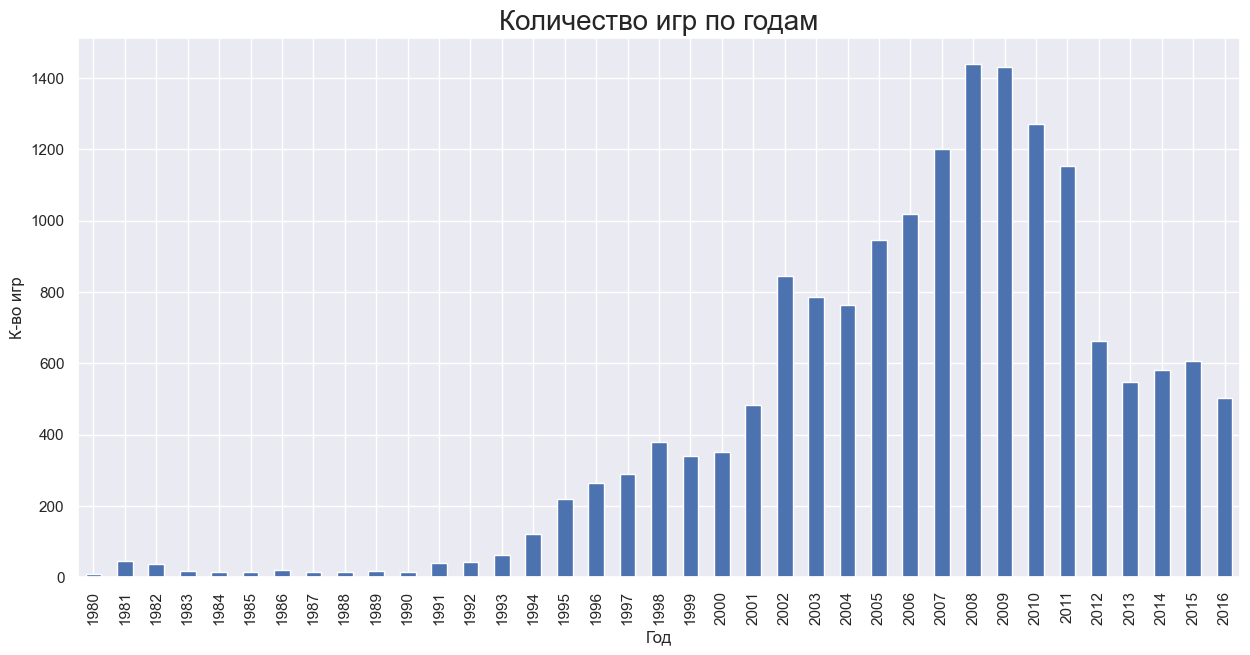

In [21]:
sns.set()
(df['year_of_release']
 .value_counts()
 .sort_index(ascending=True)
 .plot(kind='bar'))
plt.title("Количество игр по годам", fontsize=20);
plt.xlabel("Год");
plt.ylabel("К-во игр");

Очевидно, что доля игр до 95 года очень мала. Заметно, что до 2008-09 годов был быстрый рост количества игр, затем началось снижение. Это может быть связанно как с тем, что новые игры требуют больше времени на создание и спрос на качественные игры начинает расти при насыщении рынка большим к-вом игр, а также увеличением популярности мобильных игр. Понятно, что данные за "нулевые" года окажут большее влияние, чем данные за "80-90е". 


Найдем лидирующие по продажам платформы:

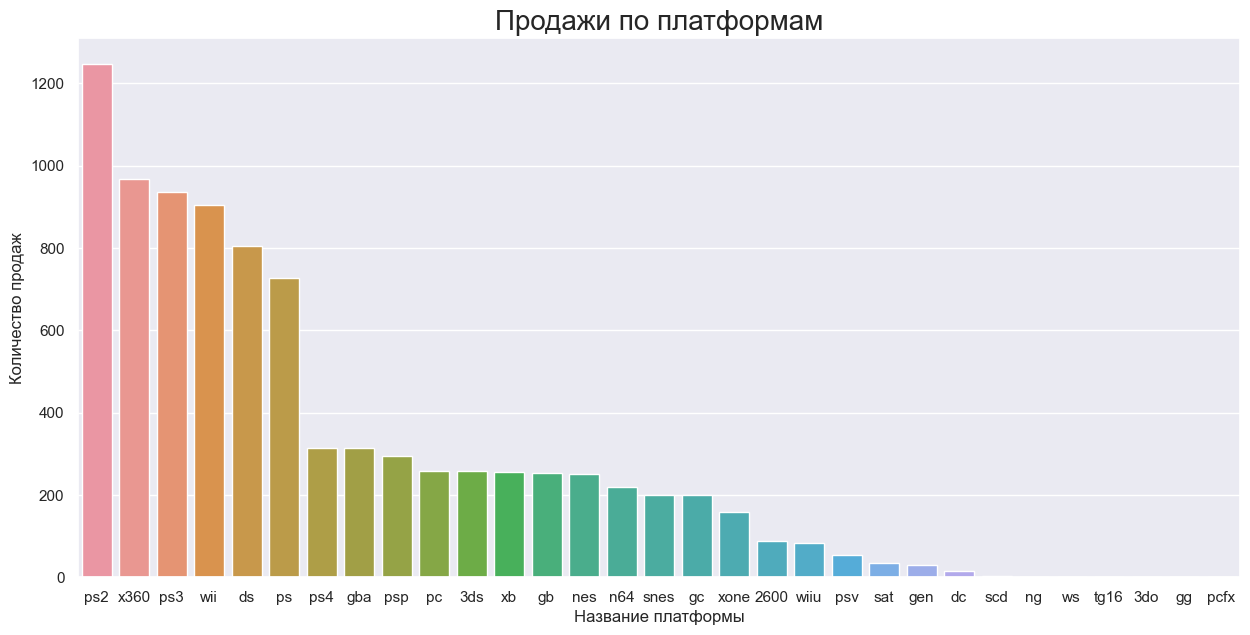

In [22]:
# скорее всего придется использовать такой механизм в дальнейшем, поэтому сразу создадим функцию
# data - нужный датафрейм
# col_name - название столбца, по которому хотим увидеть значения
# x_name, y_name, title - подписи к осям и графику
# sales - какие данные по продажам будем использовать
def plt_func (data, col_name, x_name='', y_name='', title='', sales='all_sales'):
    pivot = data.pivot_table(
        index=col_name, values=sales, aggfunc='sum').sort_values(by=sales, ascending=False);  
    sns.barplot(x=pivot.index, y=pivot[sales]);
    plt.title(title, fontsize=20);
    plt.xlabel(x_name);
    plt.ylabel(y_name);
plt_func(df, 
      'platform', 
      x_name='Название платформы', 
      y_name='Количество продаж', 
      title='Продажи по платформам', 
      sales='all_sales')


Из графика видно, что лидирующие платформы за всё время - PS2, X360, PS3, Wii, DS и PS. Создадим сводную таблицу с этими платформами и оценим суммарные продажи:

In [23]:
#функция, создающая сводные таблицы
# data - датафрейм
# col_name - интересующий столбец
# value - параметр
# num - сколько выводить
def pivot_func (data, col_name, value, num=(5)):
    pivot = data.pivot_table(
        index=col_name, values=value, aggfunc='sum').sort_values(
        by=value, ascending=False).head(num) 
    pivot = pivot.reset_index().rename_axis(None, axis=1)
    return pivot.head(num)
top_plat_pivot =  pivot_func (df, 
                              'platform', 
                              'all_sales', 
                              num=6)
top_plat_pivot

,platform,all_sales
0,ps2,1247.16
1,x360,966.61
2,ps3,935.19
3,wii,903.31
4,ds,804.28
5,ps,727.58


Для того, чтобы построить график, необходимо для каждой платформы отобрать значения по годам (все они появлялись в разные года). Для упрощения задачи, напишем функцию, которая будет возвращать данные сразу сводной таблицей со значениями с 1995 года (все платформы попадут в этот диапазон)

In [24]:
def plat_sale(name, data):
    func = data[(data['platform'] == name) & (data['year_of_release'] > 1995)].pivot_table(
        index='year_of_release', values='all_sales', aggfunc='sum').sort_values(
        'year_of_release', ascending=False)
    return func

Посмотрим, как выглядят графики продаж для этих платформ по годам:

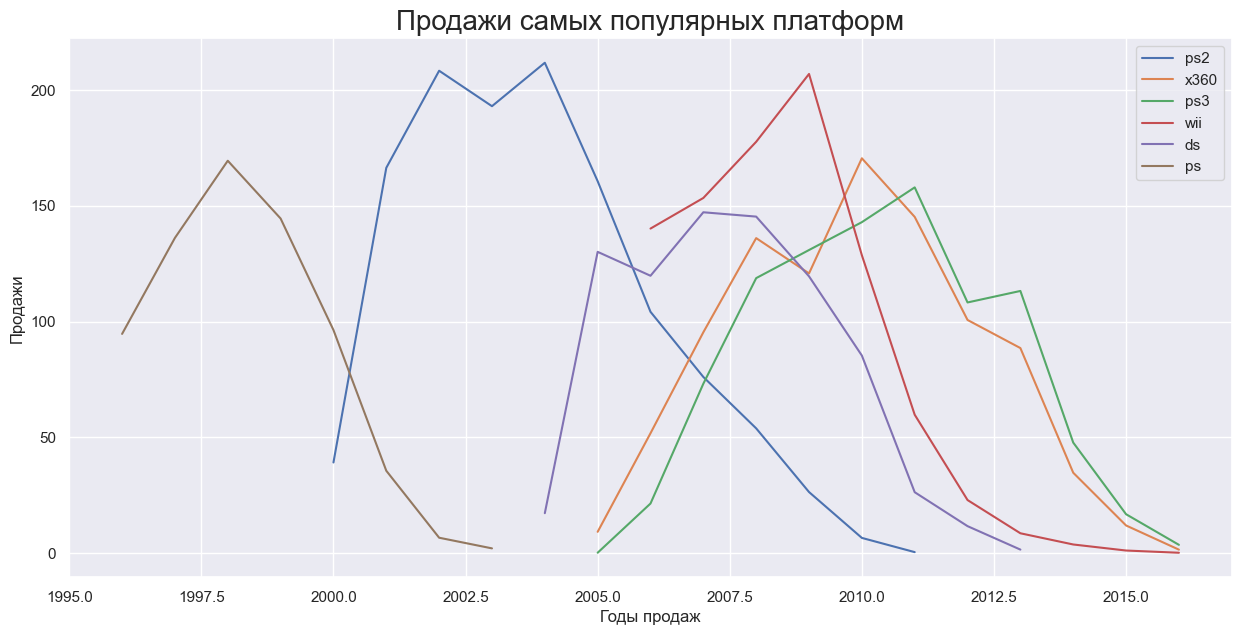

In [25]:
plt.title('Продажи самых популярных платформ', fontsize=20)
plt.xlabel('Годы продаж')
plt.ylabel('Продажи')

for i in list(top_plat_pivot['platform']):
    sns.lineplot(data=plat_sale(i,df)['all_sales'], label=i)
    plt.legend()

На графике видно, что "срок жизни" платформы в среднем - около 10 лет. Это отчетливо заметно на примере приставок одной компании - PS, PS2 и PS3. Примерно каждые 10 лет при явном падении продаж старого поколения, выходит новое, которое в свою очередь через 10 лет заменяется на ещё более новое. Для Wii и Х360 также заметна тенденция к десятилетнему сроку жизни. Попробуем чуть точнее определить срок жизни:

In [26]:
(df.loc[:,['year_of_release', 'platform']]
        .drop_duplicates() #уберем дубликаты платформ, чтобы не сложить их вместе
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       ).describe() 

,year_of_release
count,31.000000
mean,7.806452
std,5.114811
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


Более точное значение - 7 лет. 

Исходя из информации, полученной ранее сделаем вывод, что актуальный период для наших исследований - саммый близкий год к нашему (2017 для данного датасета). При этом, учитывая тенденцию к сменяемости платформ раз в 7 лет, мы приходим к выводу, что данные старше этого срока нас не интересуют - они потеряли актуальность. Меньший срок не будем брать, чтобы была возможность визуально отследить динамику изменений для каждой платформы:

In [27]:
act_df = df.loc[df['year_of_release'] >= 2010]

Рассмотрим, как чуствуют себя современные (на момент 2017 года) платформы:

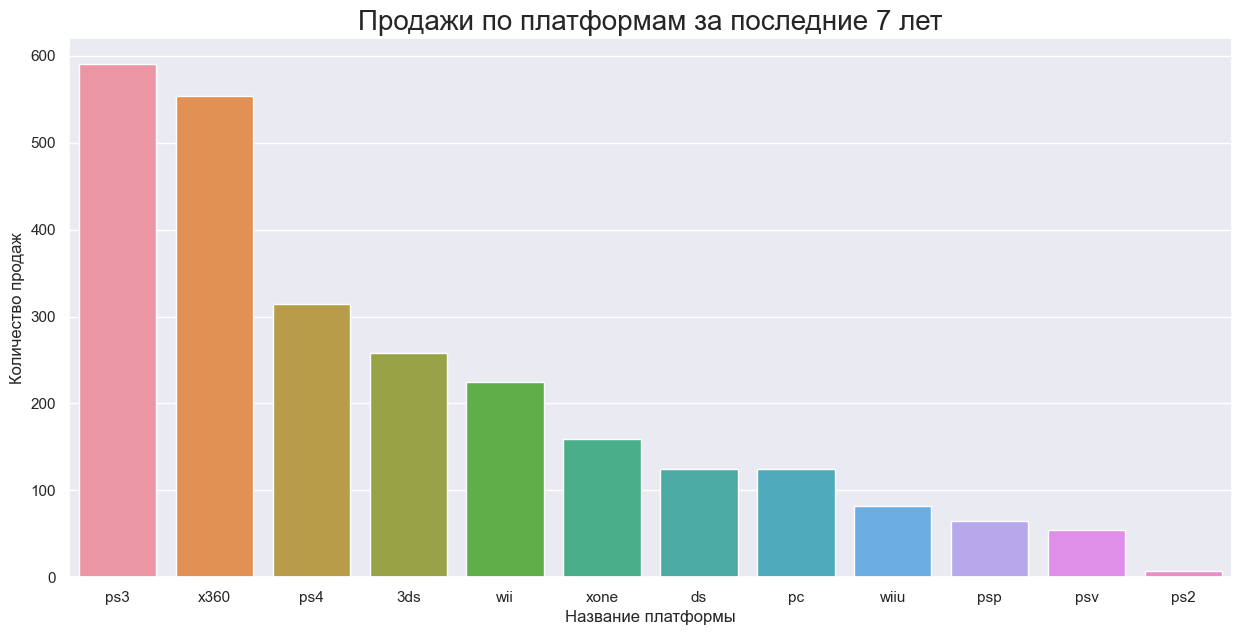

In [28]:
plt_func(act_df, 
      'platform', 
      x_name='Название платформы', 
      y_name='Количество продаж', 
      title='Продажи по платформам за последние 7 лет', 
      sales='all_sales')


Посмотрим, как меняются продажи в зависимости от года:

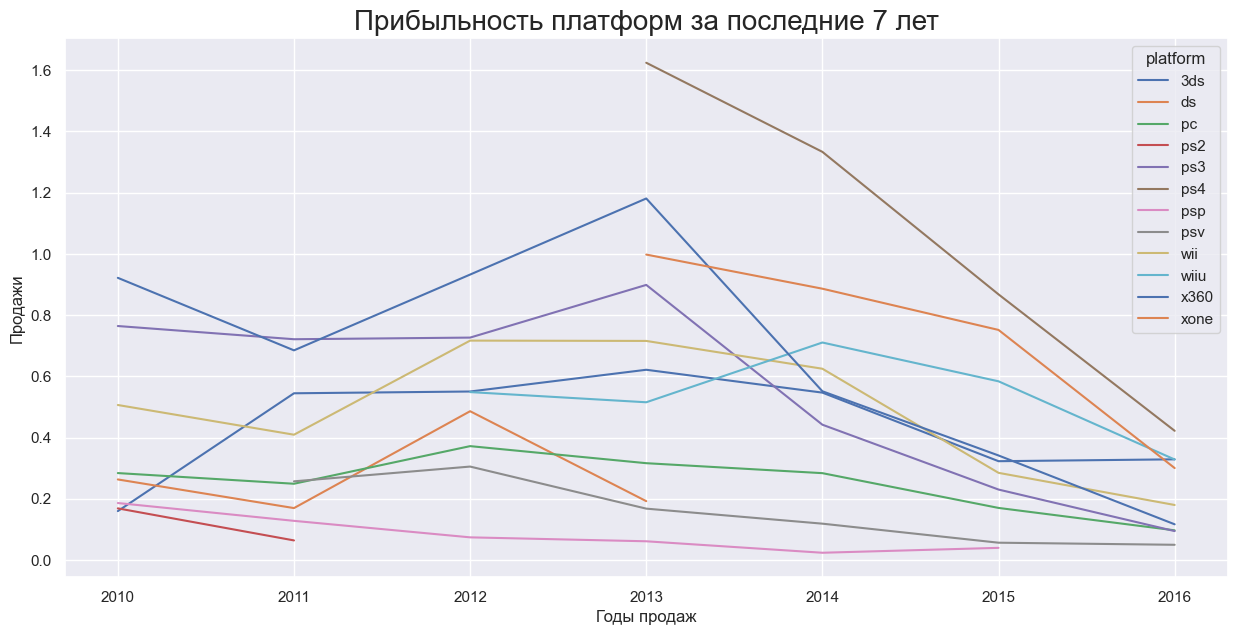

In [29]:
pivot = (act_df
         .pivot_table(index=['year_of_release'],columns='platform',values='all_sales')
         .plot(grid=True, title='Колебание цены'))
plt.title('Прибыльность платформ за последние 7 лет', fontsize=20)
plt.xlabel('Годы продаж')
plt.ylabel('Продажи');

Сразу отметиим, что в наши данные попали неактуальные платформы - они жили после 2010, но в 2017 явно устаревшие - PSP, PS2 и DS. Избавимся от них для большей наглядности и рассмотрим самые актуальные данные, начиная с 2015 года (данные о 16 могут быть не полными):

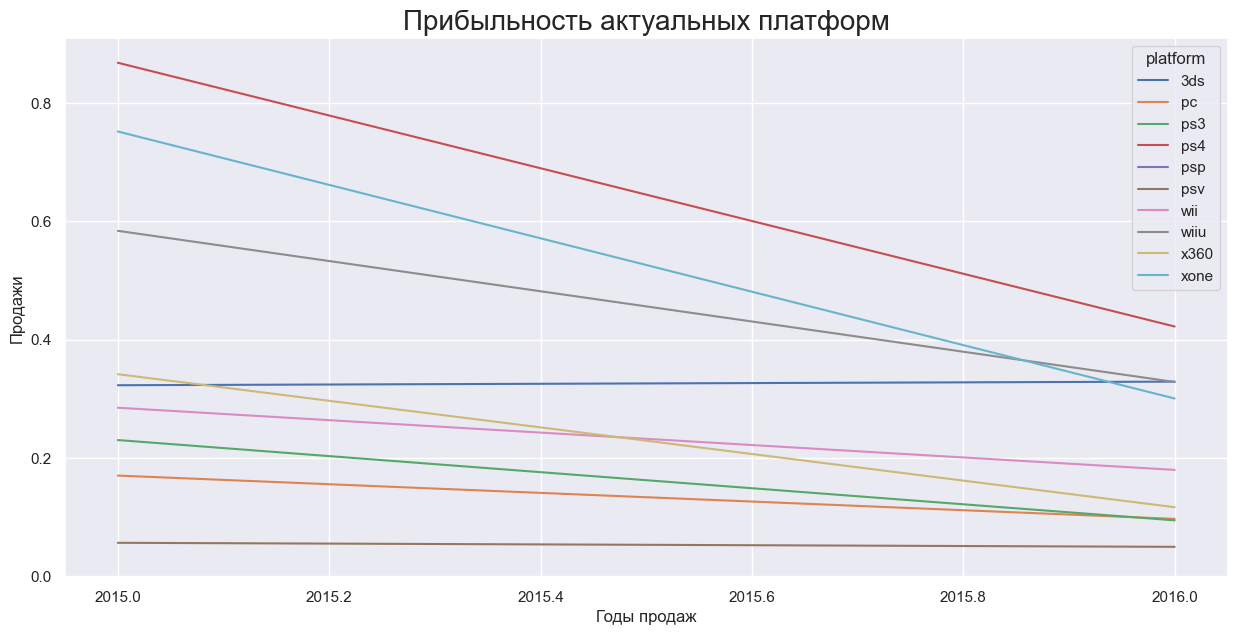

In [30]:
act_df = df.loc[df['year_of_release'] >= 2015]
pivot = (act_df
         .pivot_table(index=['year_of_release'],columns='platform',values='all_sales')
         .plot(grid=True, title='Колебание цены'))
plt.title('Прибыльность актуальных платформ', fontsize=20)
plt.xlabel('Годы продаж')
plt.ylabel('Продажи');

Согласно нашим данным - большинство платформ падают в продажах. Рост наблюдается у 3DS, наименьшее падение у PC и PSV, однако и изначальный уровень продаж у них лежит ниже, чем для PS4 и XOne, падение у которых гораздо быстрее.

Построим диаграмму размаха по глобальным продажам игр в разбивке по актуальным платформам

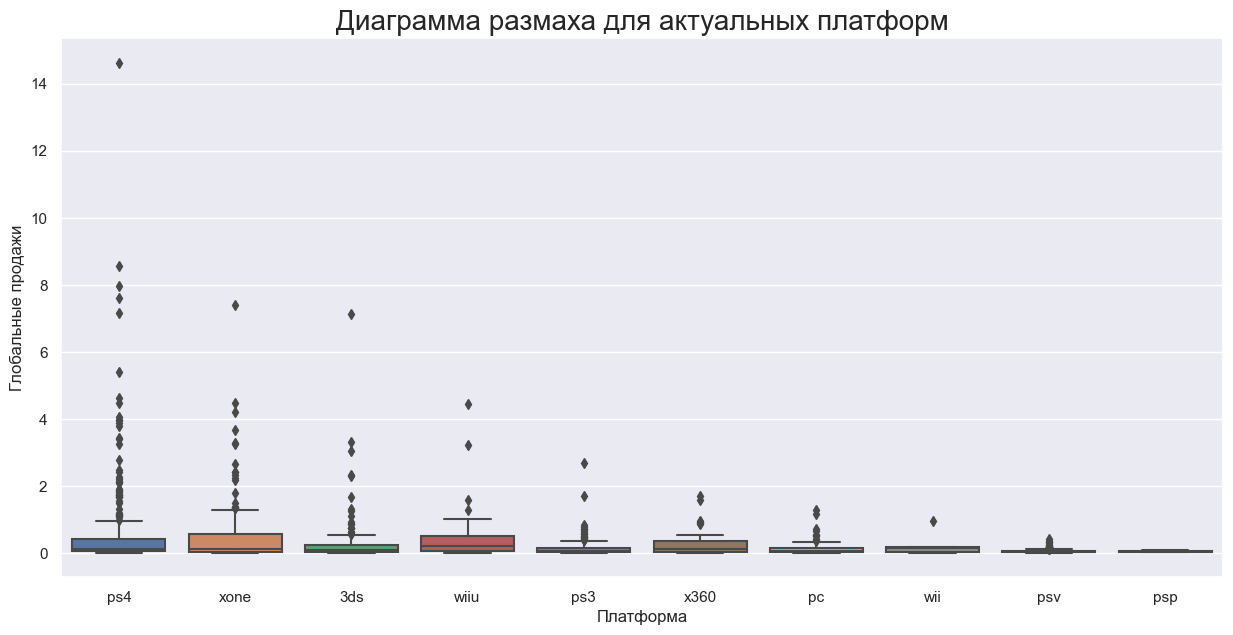

In [31]:
sns.boxplot(data=act_df, x='platform', y='all_sales')
plt.title('Диаграмма размаха для актуальных платформ', fontsize=20)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Отметим, что для многих платформ имеются выбросы - явно дорогие игры с хорошей прибылью, но таких значений крайне мало. Большинство игр зарабатывают очень мало. Рассмотрим подробнее для актуальных платформ. Оценим влияние отзывов людей и критиков, построим диаграммы размаха для трех самых популярных платформ, оценим среднее и медианные значения продаж. Рассмотрим 5 самых "прибыльных" платформ из тех, что будут актуальны на 2017 год:

In [32]:
act_plat_pivot = act_df.pivot_table(
    index='platform', values='all_sales', aggfunc='sum').sort_values(
    by='all_sales', ascending=False).head() 
act_plat_pivot = act_plat_pivot.reset_index().rename_axis(None, axis=1)
act_plat_pivot.head()

,platform,all_sales
0,ps4,188.15
1,xone,86.29
2,3ds,42.92
3,wiiu,20.95
4,ps3,20.42


Очевидно, что на момент 2017 года из данных платформ актуальными останутся первые 3. Остальные Уже показывали падение продаж и на момент 15 года продажи в 2 раза меньше, чем у третьего места

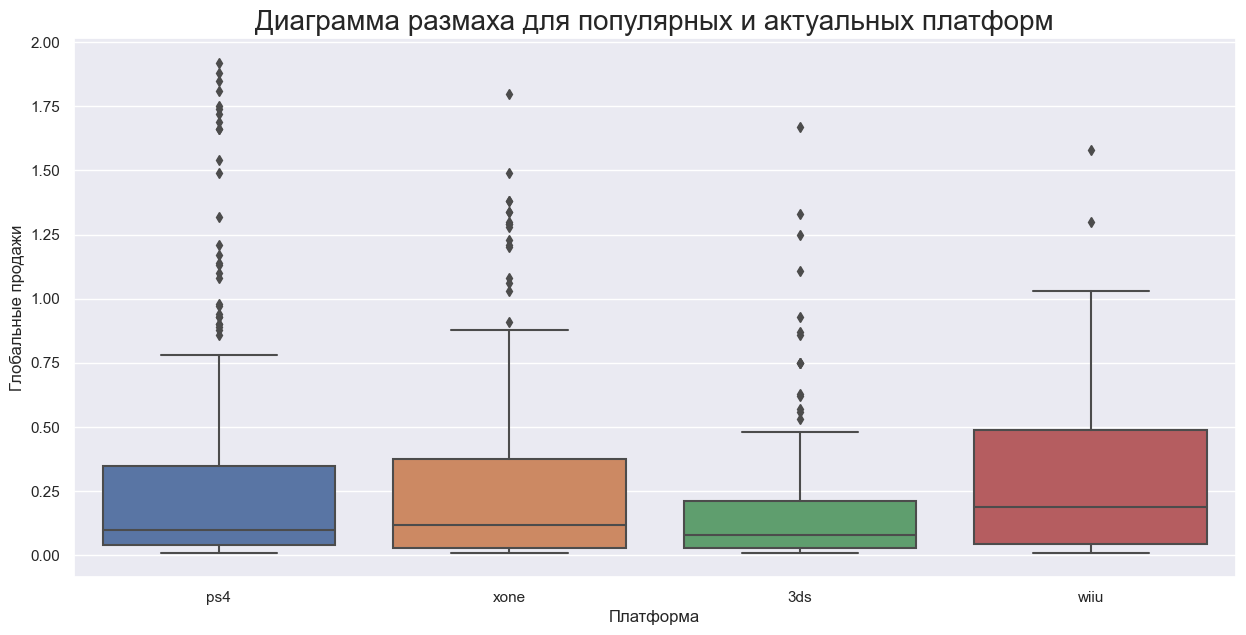

In [33]:
act_top_plat = act_df.query(
    '(platform == "ps4" or platform == "xone" or platform == "3ds" or platform == "wiiu") and all_sales < 2')

sns.boxplot(data=act_top_plat, x='platform', y='all_sales')
plt.title('Диаграмма размаха для популярных и актуальных платформ', fontsize=20)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

xone = act_df.query('platform == "xone"')
ps4 = act_df.query('platform == "ps4"')
n3ds = act_df.query('platform == "3ds"')
wiiu = act_df.query('platform == "wiiu"')

Отметим, что если отбросить выбросы, то средние прибыльности у четырех самых актуальных платформ близки. Однако, отметим, что доля игр, "выше среднего" (медианы) и "ниже среднего" для WiiU примерно равна, в отличии от остальных приставок, где доля "скорее прибыльных" игр выше, чем "скорее не слишком прибыльных".

Оценим влияне отзывов на продажи актуальных платформ:

#### PS4

Коэффициент корреляции: 0.3928485555130597


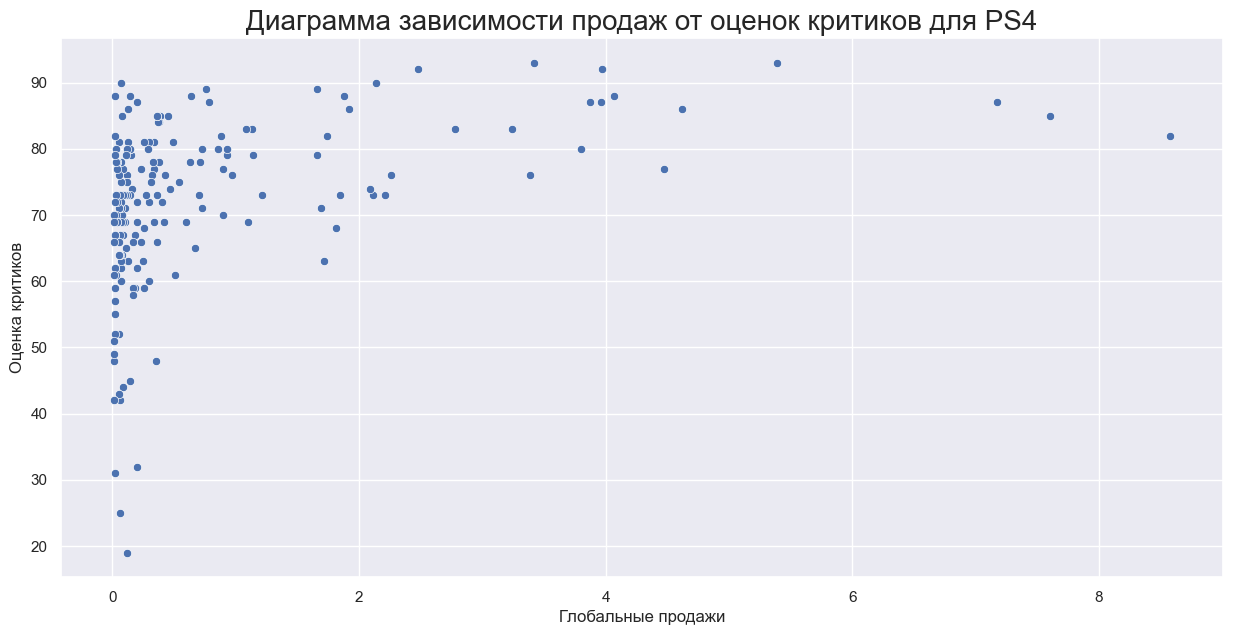

In [34]:
#cоздадим функции, которые будут строить scatterplot для оценок критиков и считать корреляцию:
# data - нужный датафрейм
# x_parameter, y_parameter - параметры для поиска корреляции, последовательность важна только для красоты графика
# x_name, y_name, title - подписи к осям и графику
# corr - нужно ли считать корреляцию (по умолчанию True)
def scatterplot_func(data, x_parameter, y_parameter, x_name='', y_name='', title='', corr=(True)):
    sns.scatterplot(data=data, x=x_parameter, y=y_parameter);
    plt.title(title, fontsize=20)
    plt.ylabel(y_name, fontsize=12)
    plt.xlabel(x_name,fontsize=12);
    if corr == True:
        print (f'Коэффициент корреляции: {data[x_parameter].corr(data[y_parameter])}')


scatterplot_func(ps4, 
                 x_parameter='all_sales', 
                 y_parameter='critic_score',
                 x_name='Глобальные продажи',
                 y_name='Оценка критиков',
                 title='Диаграмма зависимости продаж от оценок критиков для PS4')



Коэффициент корреляции: -0.05973845712638211


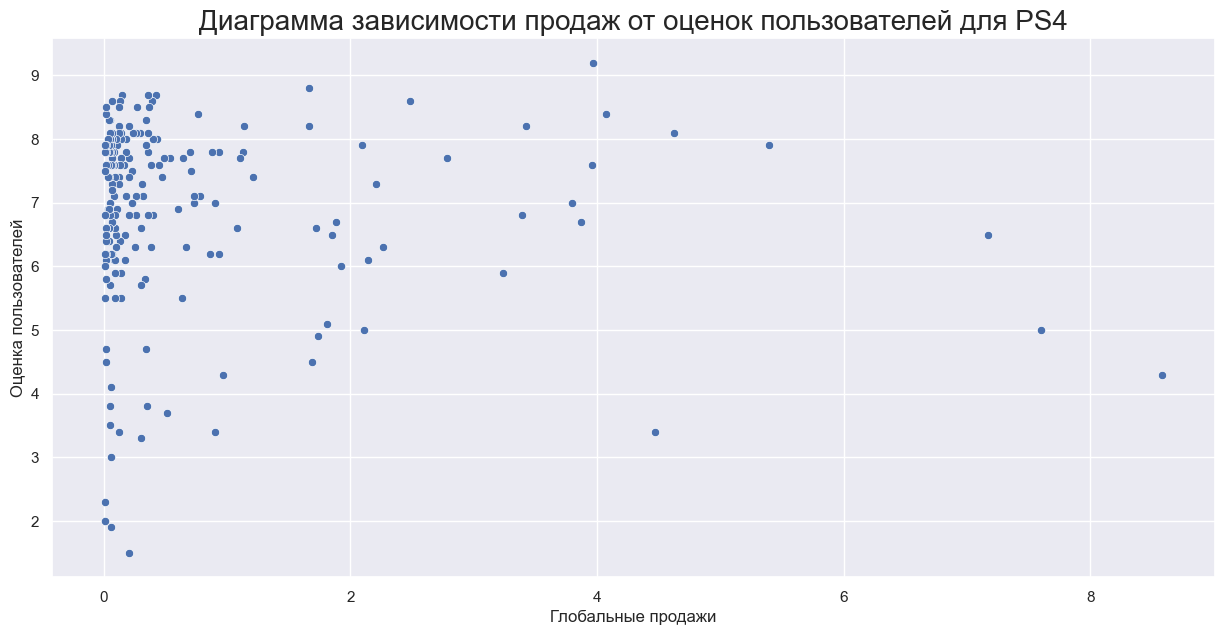

In [35]:
scatterplot_func(ps4, 
                 x_parameter='all_sales', 
                 y_parameter='user_score',
                 x_name='Глобальные продажи',
                 y_name='Оценка пользователей',
                 title='Диаграмма зависимости продаж от оценок пользователей для PS4')

#### XOne

Коэффициент корреляции: 0.4308887458213677


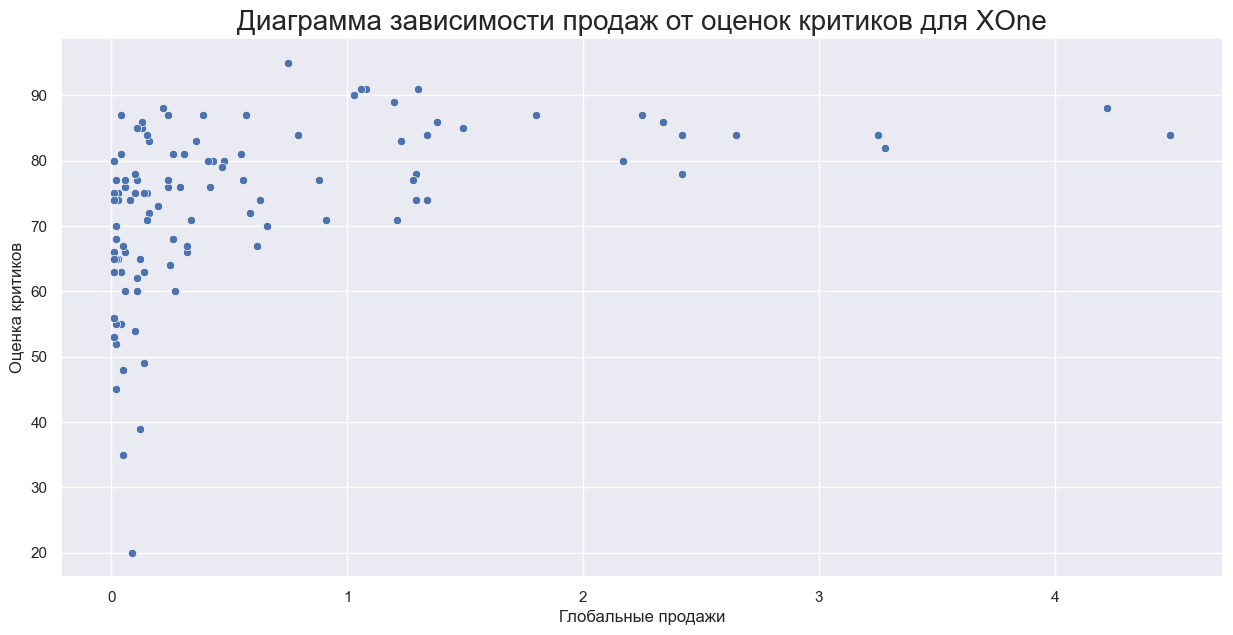

In [36]:
scatterplot_func(xone, 
                 x_parameter='all_sales', 
                 y_parameter='critic_score',
                 x_name='Глобальные продажи',
                 y_name='Оценка критиков',
                 title='Диаграмма зависимости продаж от оценок критиков для XOne')

Коэффициент корреляции: -0.04146733387366267


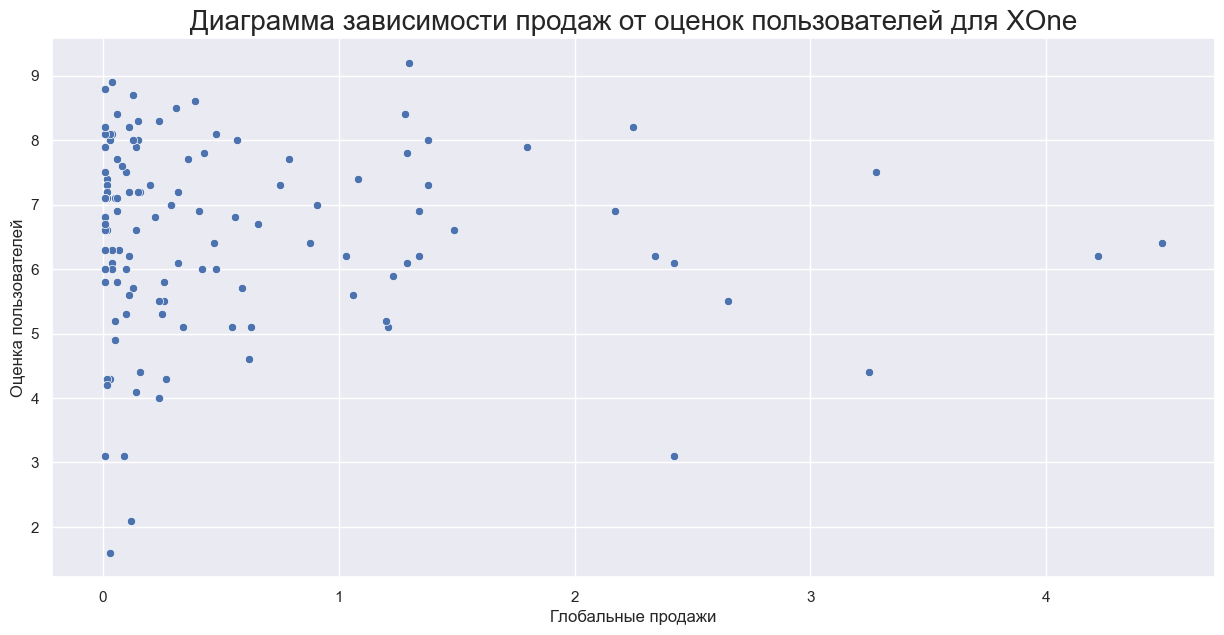

In [37]:
scatterplot_func(xone, 
                 x_parameter='all_sales', 
                 y_parameter='user_score',
                 x_name='Глобальные продажи',
                 y_name='Оценка пользователей',
                 title='Диаграмма зависимости продаж от оценок пользователей для XOne')

#### 3DS

Коэффициент корреляции: 0.17757455046092865


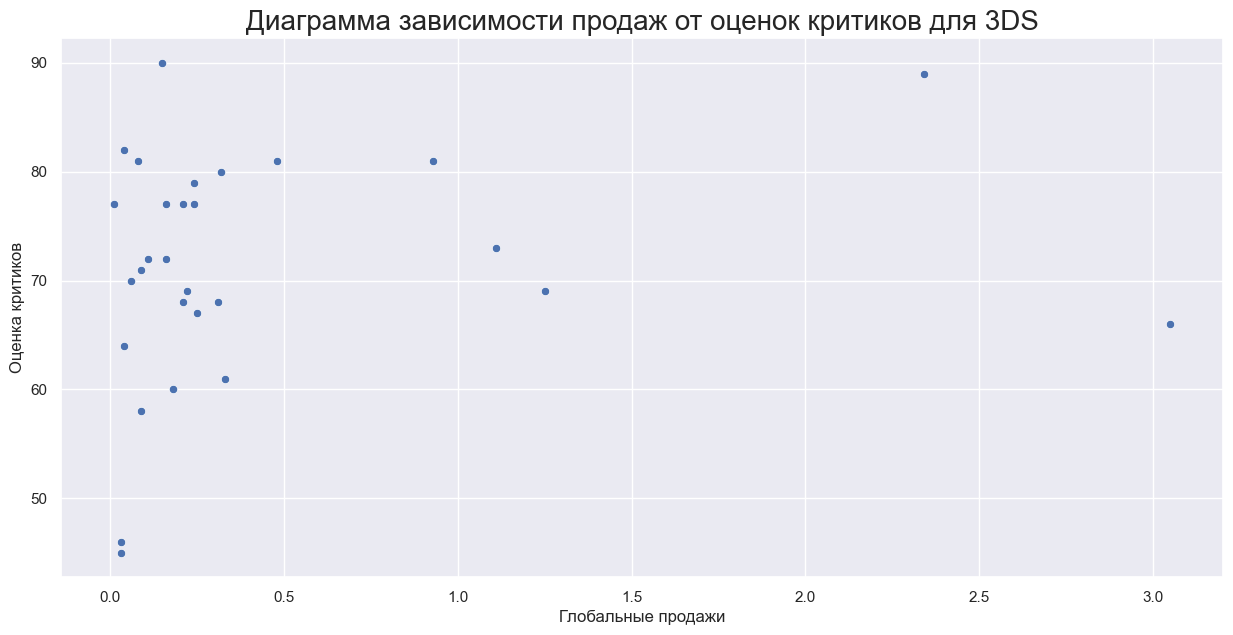

In [38]:
scatterplot_func(n3ds, 
                 x_parameter='all_sales', 
                 y_parameter='critic_score',
                 x_name='Глобальные продажи',
                 y_name='Оценка критиков',
                 title='Диаграмма зависимости продаж от оценок критиков для 3DS')

Коэффициент корреляции: 0.19879627008102987


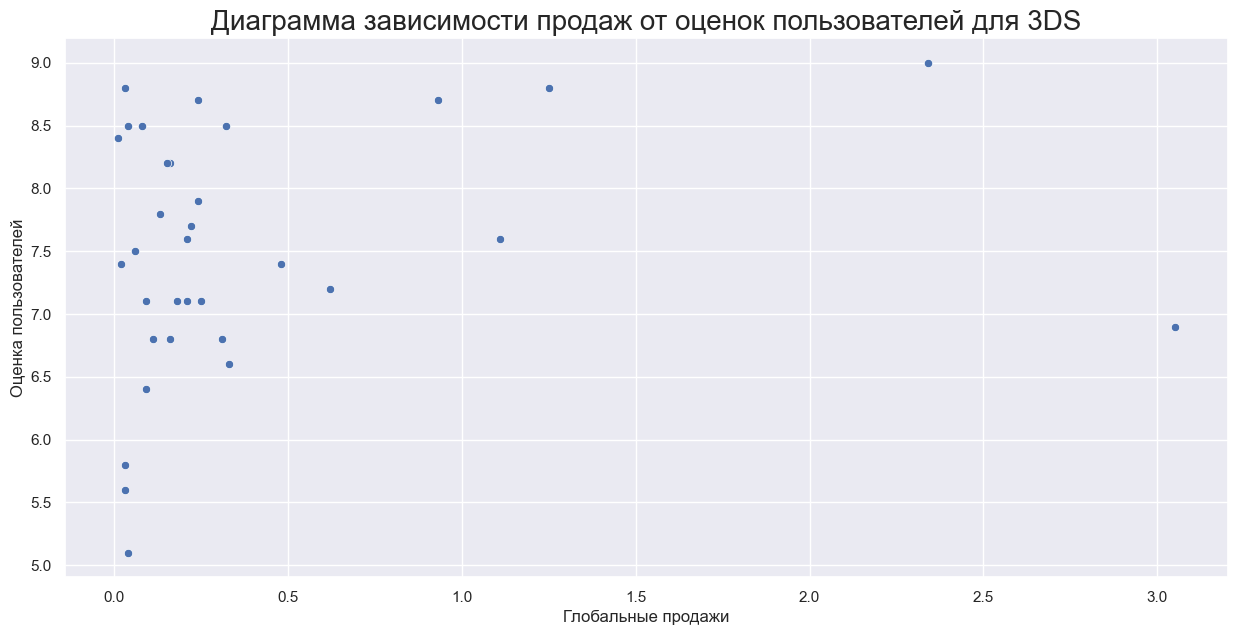

In [39]:
scatterplot_func(n3ds, 
                 x_parameter='all_sales', 
                 y_parameter='user_score',
                 x_name='Глобальные продажи',
                 y_name='Оценка пользователей',
                 title='Диаграмма зависимости продаж от оценок пользователей для 3DS')

#### WiiU

Коэффициент корреляции: 0.31704571176962204


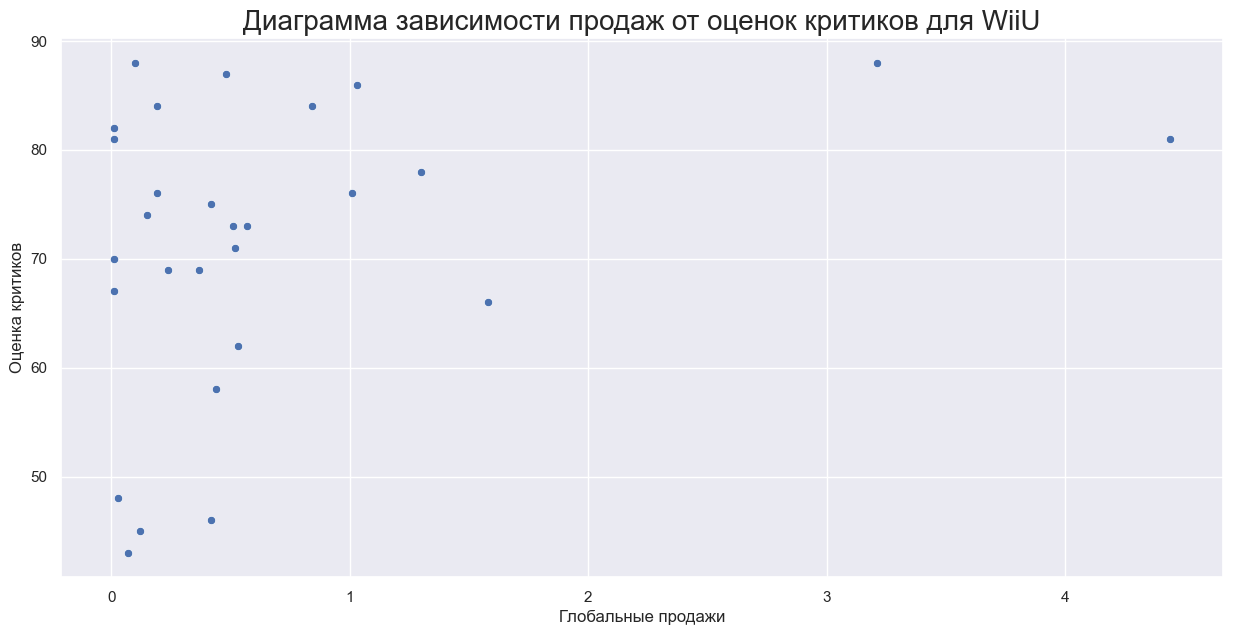

In [40]:
scatterplot_func(wiiu, 
                 x_parameter='all_sales', 
                 y_parameter='critic_score',
                 x_name='Глобальные продажи',
                 y_name='Оценка критиков',
                 title='Диаграмма зависимости продаж от оценок критиков для WiiU')

Коэффициент корреляции: 0.36351857248094455


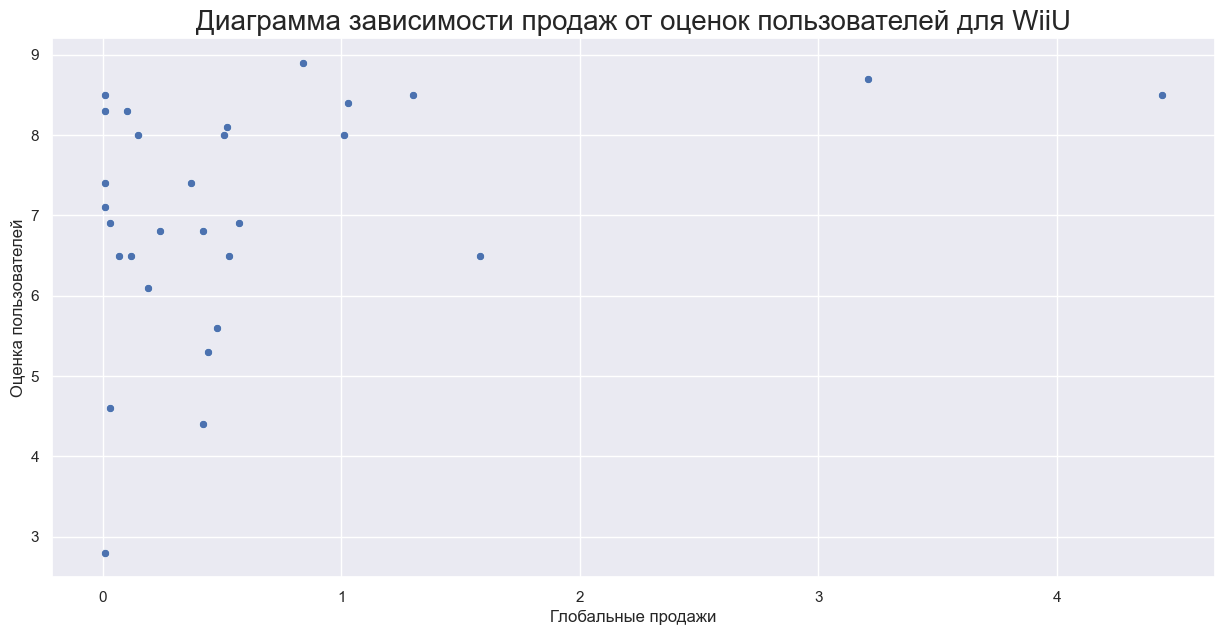

In [41]:
scatterplot_func(wiiu, 
                 x_parameter='all_sales', 
                 y_parameter='user_score',
                 x_name='Глобальные продажи',
                 y_name='Оценка пользователей',
                 title='Диаграмма зависимости продаж от оценок пользователей для WiiU')

На отдельных диаграммах трудно увидеть однозначную зависимость.

Кажется, что зависимость продаж больше зависит от оценок критиков, нежели от оценок других игроков. Попробуем наложить диаграммы друг на друга, чтобы убедиться, что это не аномалии отдельных платформ, а общая зависимость:

Коэффициент корреляции: 0.3928485555130597
Коэффициент корреляции: 0.4308887458213677
Коэффициент корреляции: 0.17757455046092865
Коэффициент корреляции: 0.31704571176962204


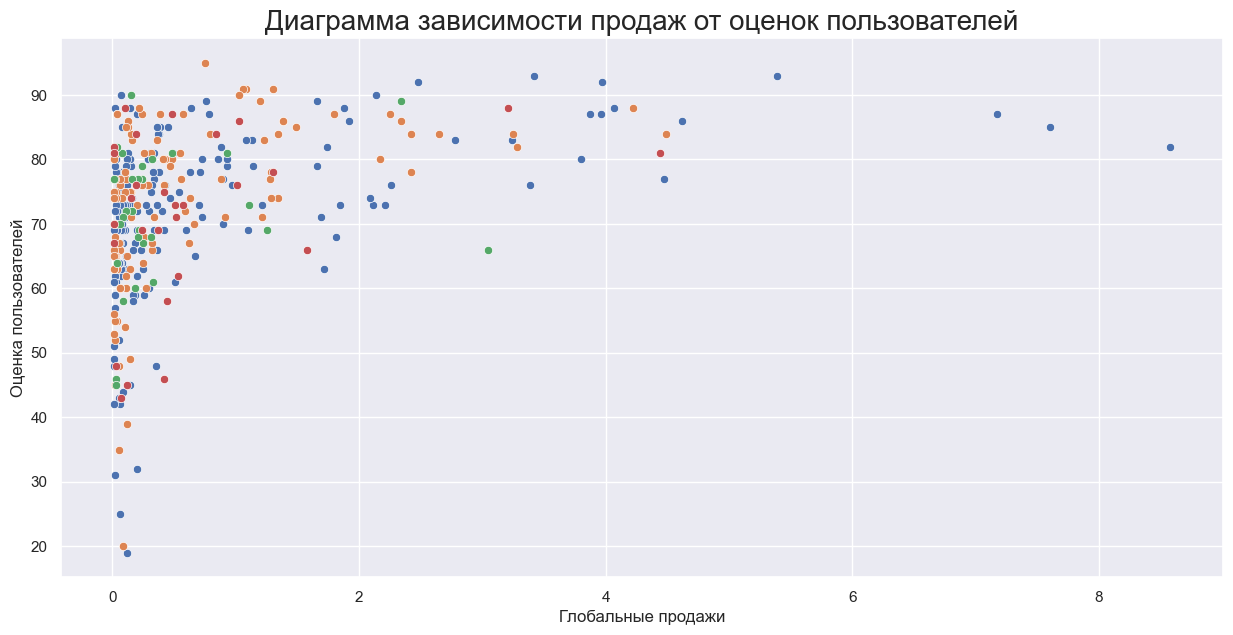

In [42]:
plat_list = [ps4, xone, n3ds, wiiu]
for i in plat_list:
    scatterplot_func(i, 
                     x_parameter='all_sales', 
                     y_parameter='critic_score',
                     x_name='Глобальные продажи',
                     y_name='Оценка пользователей',
                     title='Диаграмма зависимости продаж от оценок пользователей')

Коэффициент корреляции: -0.05973845712638211
Коэффициент корреляции: -0.04146733387366267
Коэффициент корреляции: 0.19879627008102987
Коэффициент корреляции: 0.36351857248094455


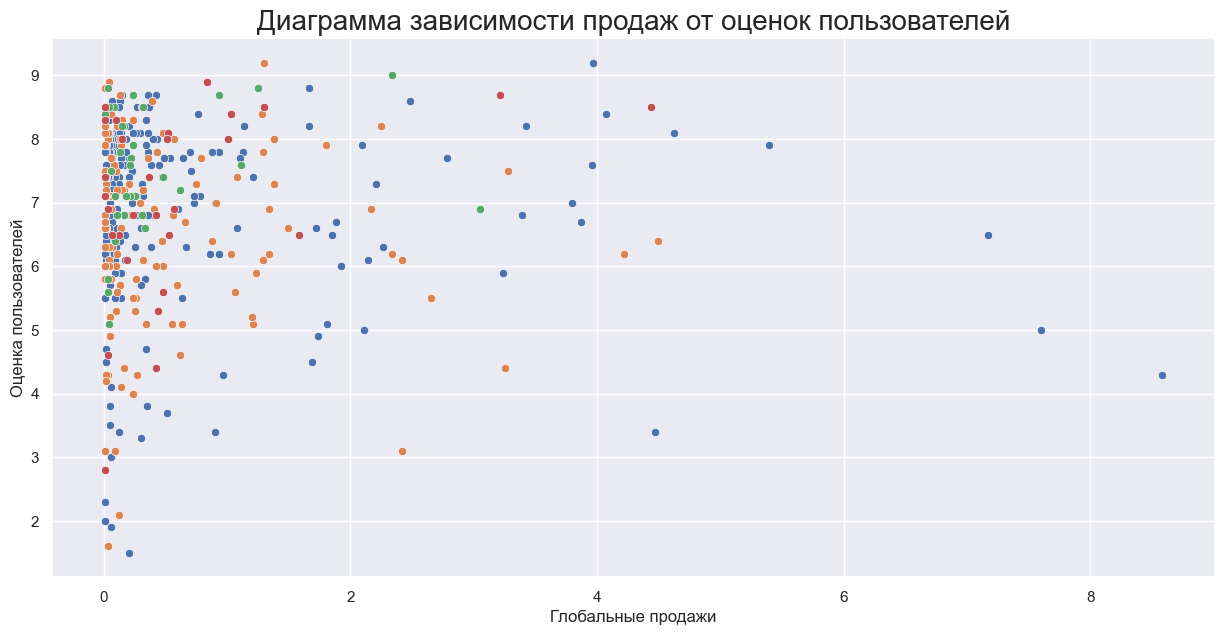

In [43]:
plat_list = [ps4, xone, n3ds, wiiu]
for i in plat_list:
    scatterplot_func(i, 
                     x_parameter='all_sales', 
                     y_parameter='user_score',
                     x_name='Глобальные продажи',
                     y_name='Оценка пользователей',
                     title='Диаграмма зависимости продаж от оценок пользователей')

Отметим, что для PS4 и XOne, корреляция явно выше для оценок критиков, нежели других пользователей. Не смотря на это, в целом, корреляция даже для критиков выражена cлабо.

Интересно, что для Nintendo коэффициент корреляции для оценок пользователей и критиков примерно один и тот же.

Посмотреть разбивку игр по жанрам интересно для всего датафрейма:

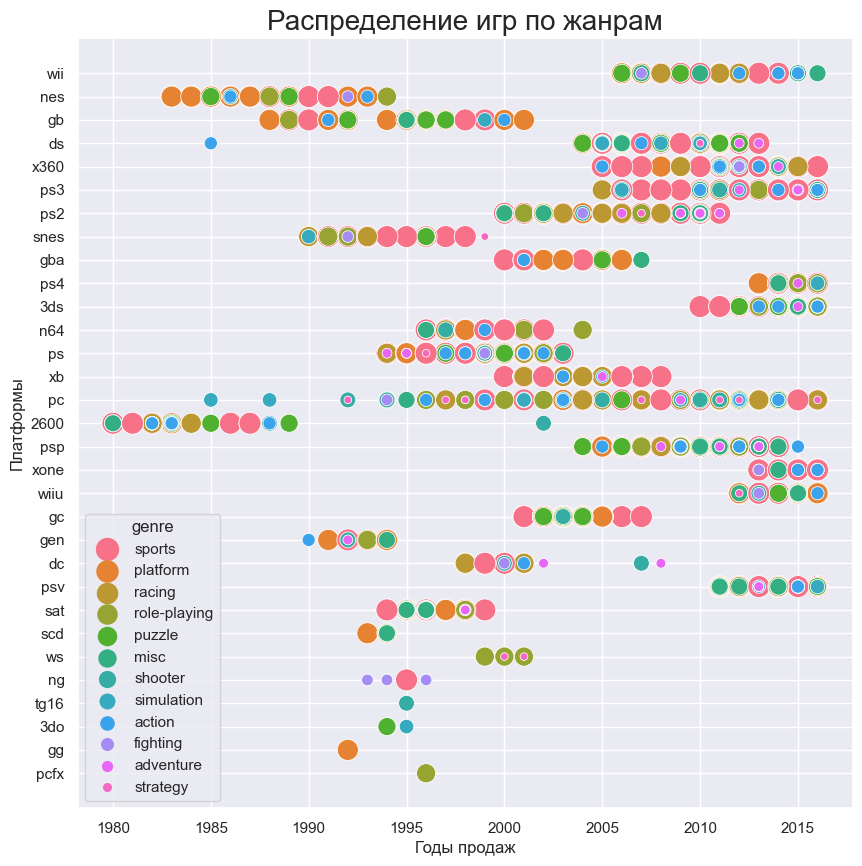

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="year_of_release", y="platform",
                     hue="genre", size="genre",
                     data=df,sizes=(30, 250))
plt.title('Распределение игр по жанрам', fontsize=20);
plt.xlabel('Годы продаж');
plt.ylabel('Платформы');

Теперь взглянем отдельно на прибыльность различных жанров:

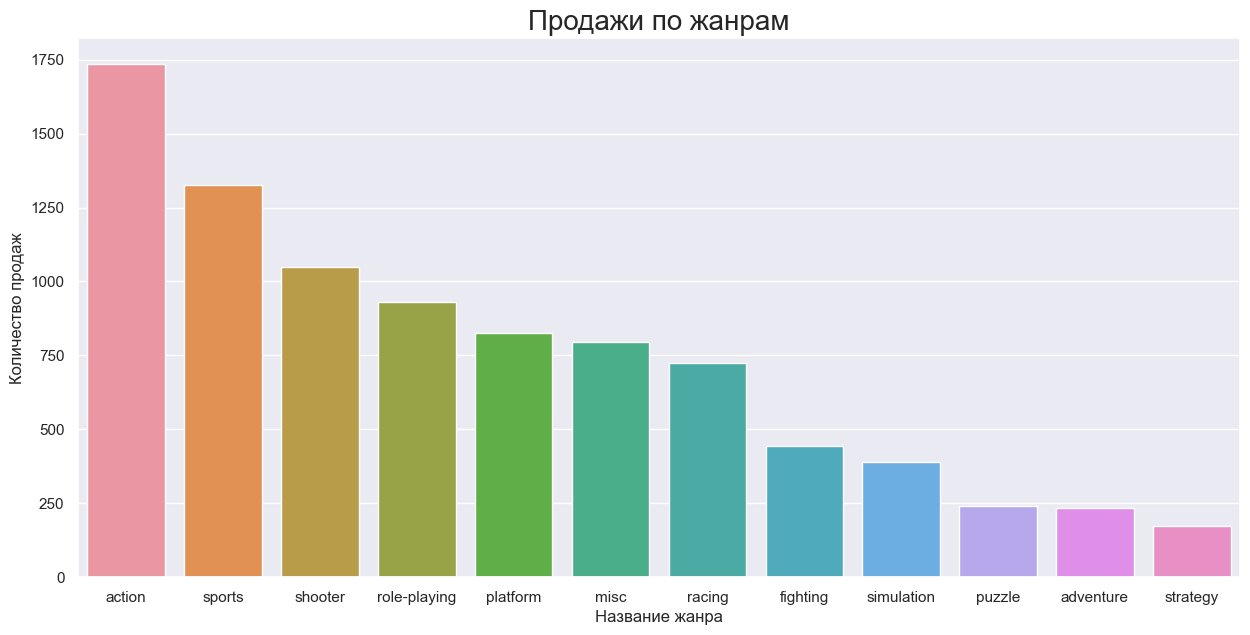

In [45]:
pivot = df.pivot_table(
    index='genre', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False);
pivot.head()
sns.barplot(x=pivot.index,y=pivot['all_sales']);
plt.title("Продажи по жанрам", fontsize=20);
plt.xlabel("Название жанра");
plt.ylabel("Количество продаж");

Очевидно, что самые продоваемые жанры это Action, Sports, Shooter. При этом продаваемость падает по жанрам довольно плавно и Role-Playing, Platform и другие не сильно падают по числу продаж. 

Однако, для жанров Strategy, Adventure и Puzzle на платформах трудные времена - продаваемость их крайне низкая.

Приведем диаграммы размаха для разных жанров и оценим к какому из них интерес стабилнее:

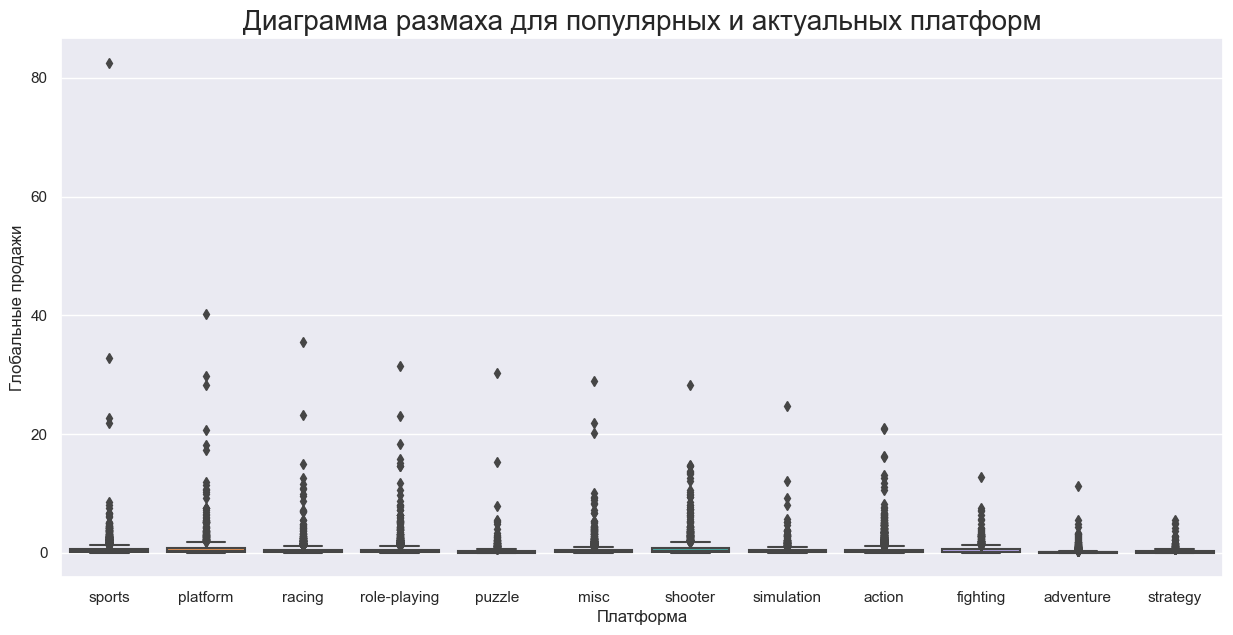

In [46]:
sns.boxplot(data=df, x='genre', y='all_sales')
plt.title('Диаграмма размаха для популярных и актуальных платформ', fontsize=20)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

График трудно читать, видно, что отдельные выбросы могут быть очень большими. Немного ограничим выбросы сверху, чтобы оценить динамику выбросов и сравнить их количество. Так мы увидим в каком жанре чаще бывают "шедевры"

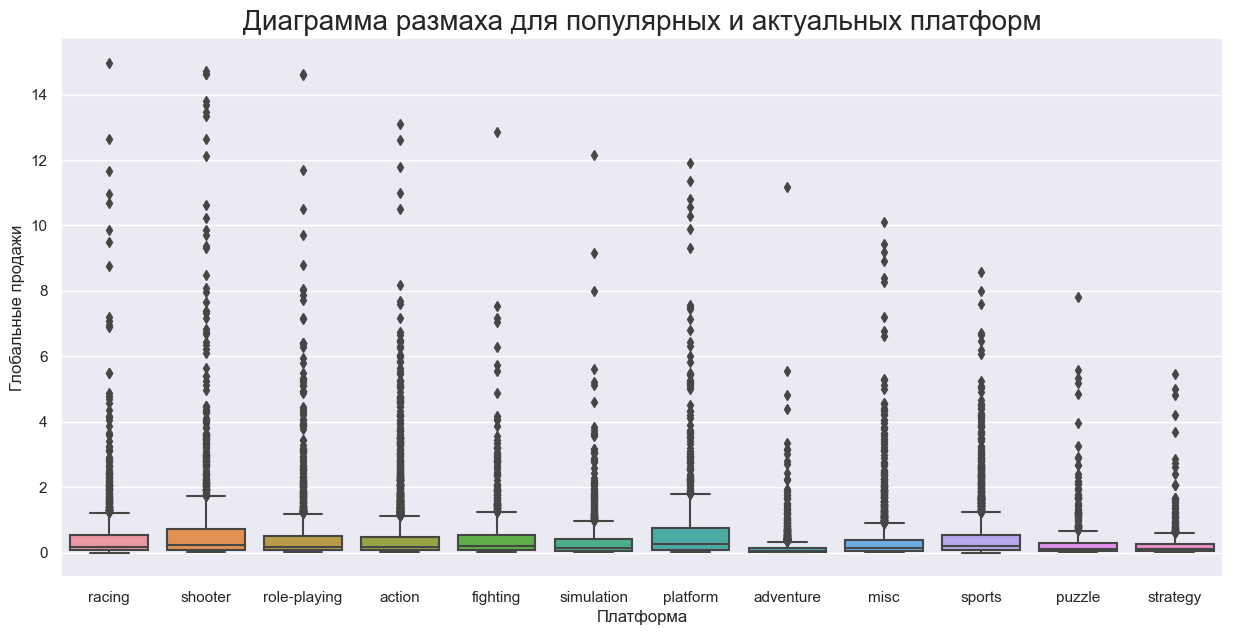

In [47]:
act_genre_plat = df.query('all_sales < 15')

sns.boxplot(data=act_genre_plat, x='genre', y='all_sales')
plt.title('Диаграмма размаха для популярных и актуальных платформ', fontsize=20)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Заметим, что выбросы характерны для всех жанров, но стратегии реже бывают "шедеврами" чем остальные игры. Подберем параметры диаграммы так, чтобы увидеть у какого жанра большее количество "в среднем успешных" игр

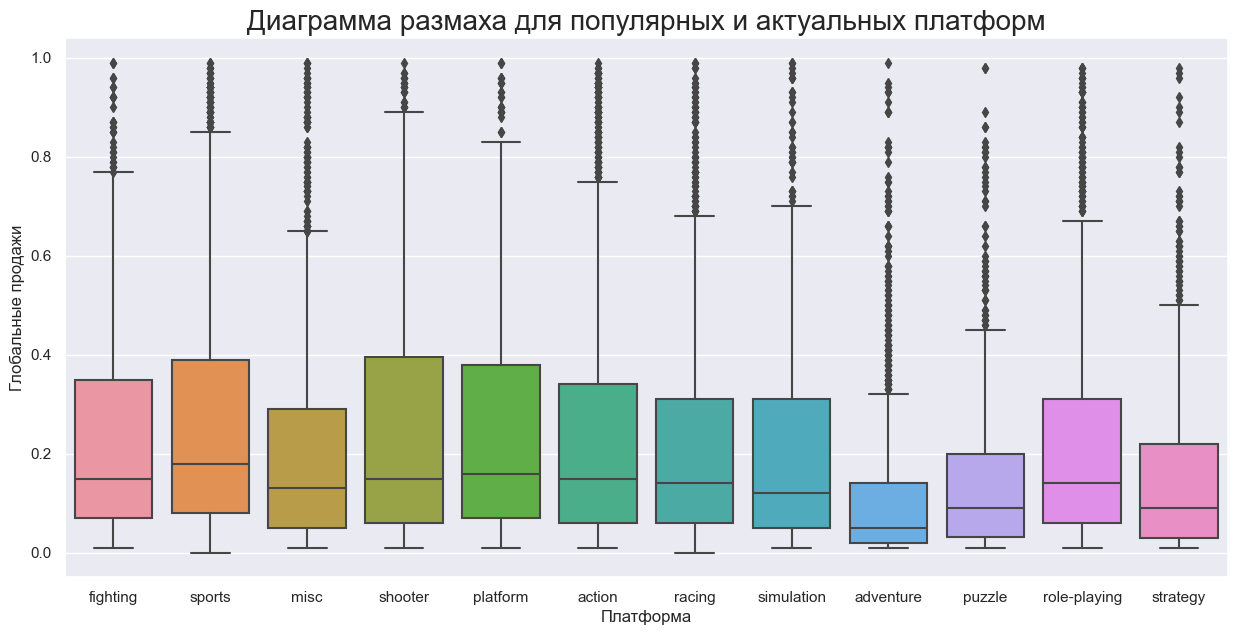

In [48]:
act_genre_plat = df.query('all_sales < 1')

sns.boxplot(data=act_genre_plat, x='genre', y='all_sales')
plt.title('Диаграмма размаха для популярных и актуальных платформ', fontsize=20)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Наибольшая длинна третей квартили относительно графика видна в шутерах, спортивных играх, платформерах, файтингах. В этих жанрах наблюдается довольно большое количество игр, которые не находятся за пределами графика, те не являются выбросами, однако их значение ощутимо больше медианного. Наименьшее отклонение от медианного значения в приключениях, паззлах и стратегиях - там цены на игры близки к медианному значению.

#  [Изучение региональной специфики](#back)
<a id='country'></a>

Для начала взглянем на самые продаваемые платформы в различных регионах за все время (интересно же!)

#### Япония

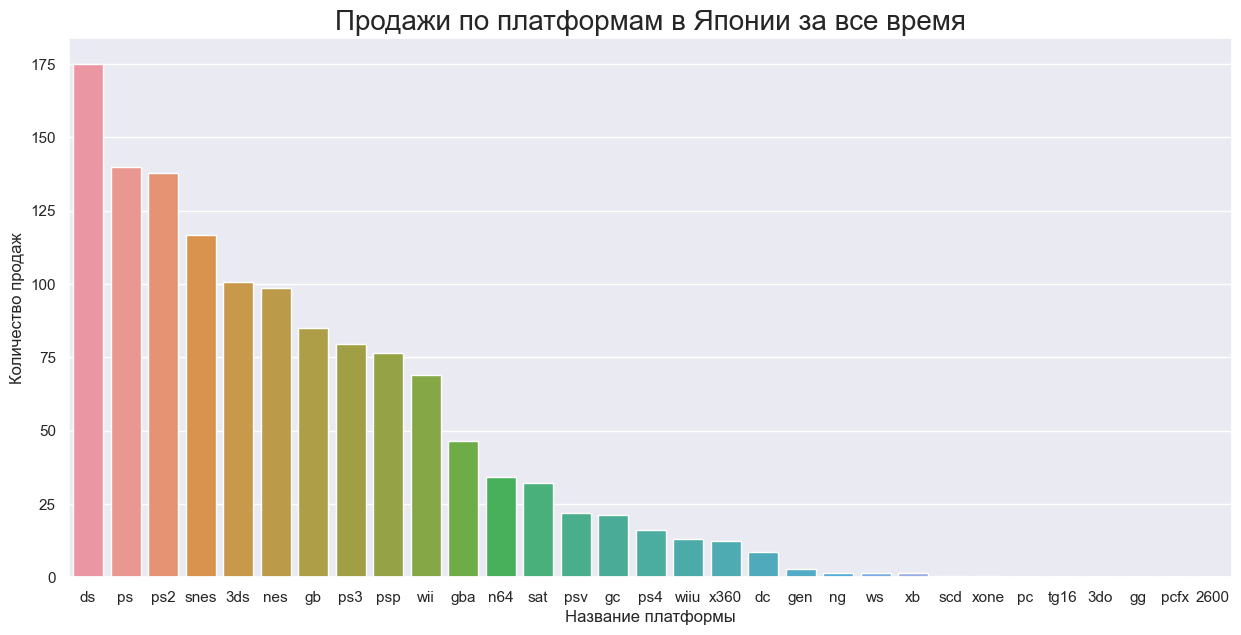

In [49]:
plt_func(df, 
      'platform', 
       x_name='Название платформы', 
       y_name='Количество продаж', 
       title='Продажи по платформам в Японии за все время', 
       sales='jp_sales')


DS, хоть и старя платформа, а всё еще держит первое место!

#### Европа

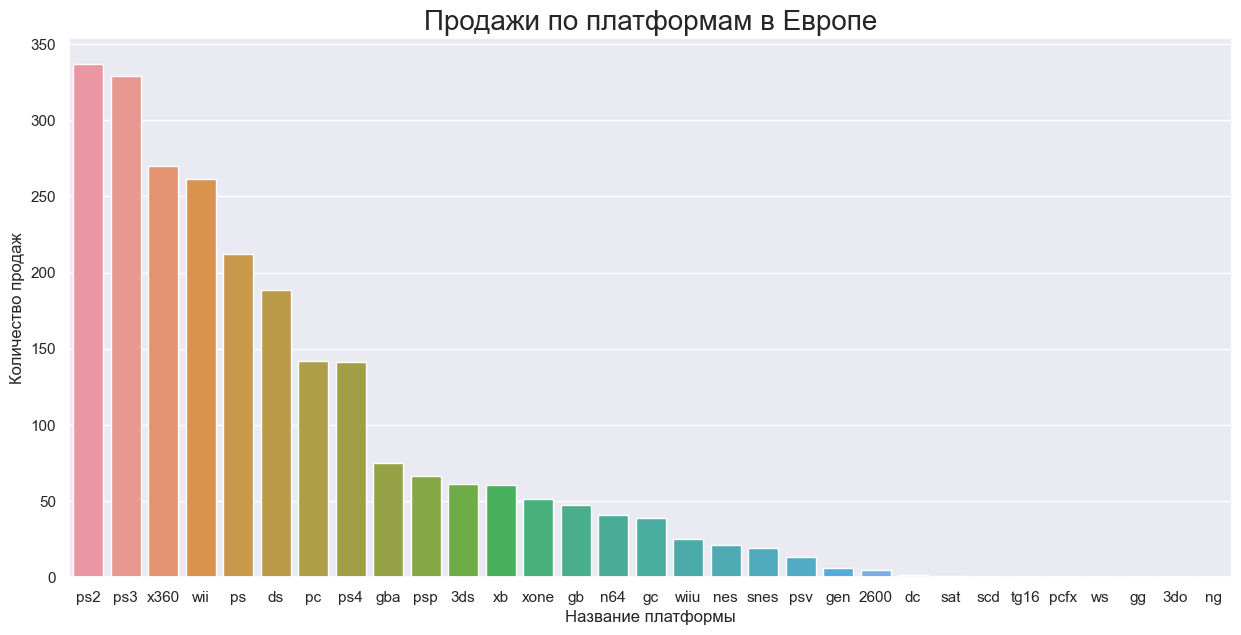

In [50]:
plt_func(df, 
      'platform', 
       x_name='Название платформы', 
       y_name='Количество продаж', 
       title='Продажи по платформам в Европе', 
       sales='eu_sales')

PS2, PS3, PS4 - европейцы любят PlayStation

#### Северная Америка

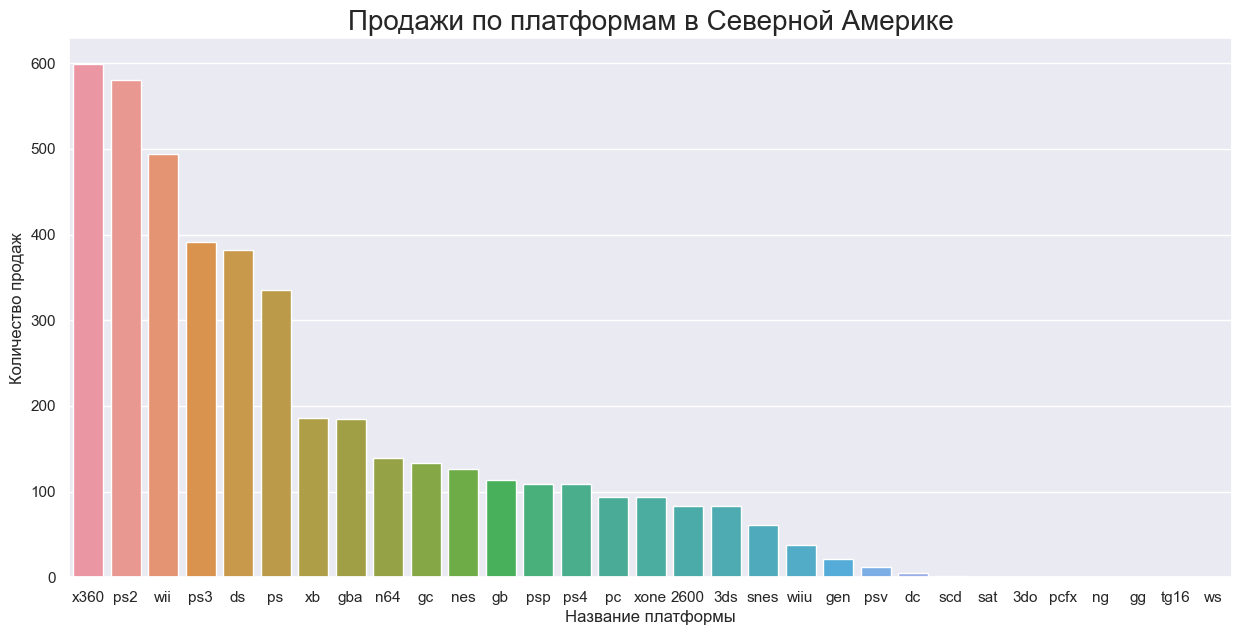

In [51]:
plt_func(df, 
      'platform', 
       x_name='Название платформы', 
       y_name='Количество продаж', 
       title='Продажи по платформам в Северной Америке', 
       sales='na_sales')

Xbox потеснил PlayStation!

Для построения общих графиков создадим функцию, которая будет строить графики для самых популярных значений по анализируемому критерию в зависимости от региона:

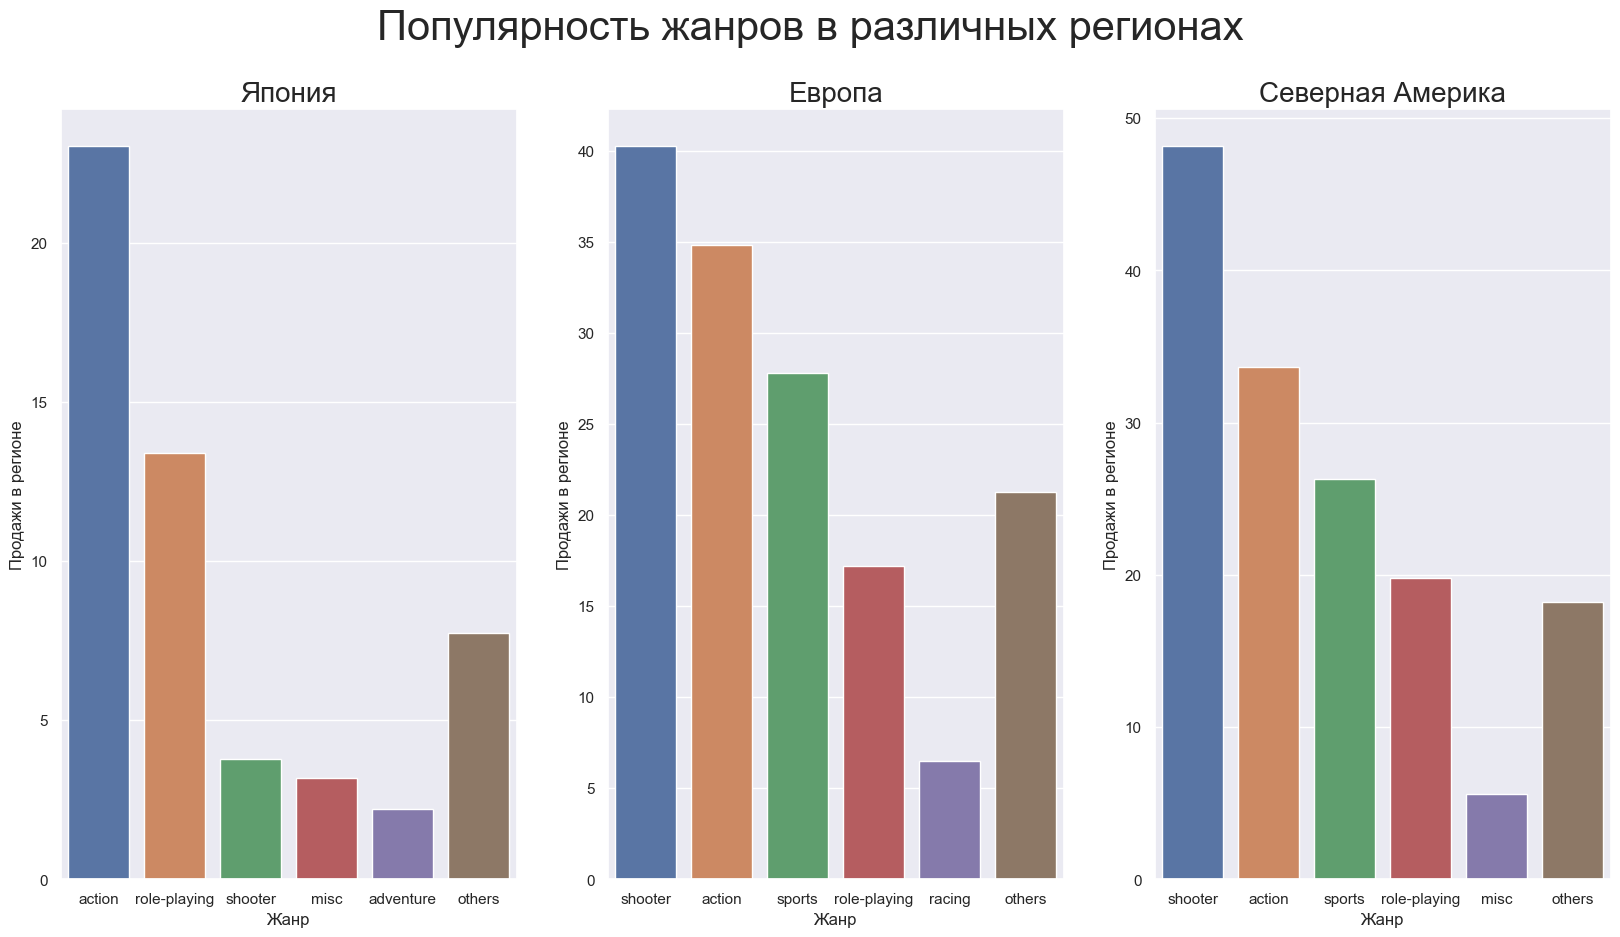

In [52]:
# axes - matplotlib axes, куда будут положены данные
# index - индекс оси
# col_name - название столбца, по которму проводим исследование
# region_sales - название столбца с продажами для данного региона
# region_nmae - название региона
# x_name - подпись к осям х (соответсвует col_name)
# y_name - подпись к осям y (соответствует продажам)
# add_others - добавить сборный столбик по оставшимся
def prep_region_plot(axes, index, col_name = 'genre', region_sales = 'jp_sales',
                     region_name = 'Япония', x_name='Жанр', y_name= 'Продажи в регионе',
                     add_others=False):
    reg_sorted = act_df.groupby(col_name)[region_sales].sum().sort_values(ascending=False);
    reg_head = reg_sorted.head().to_frame().reset_index();

    if (add_others):
        reg_tail = reg_sorted.tail(-5).to_frame().reset_index();
        others_sum = reg_tail[region_sales].sum();
        others = pd.DataFrame({col_name:['others'], region_sales:[others_sum]});
        reg_head = pd.concat([reg_head, others], ignore_index=True);

    reg_plot = sns.barplot(x=col_name, y=region_sales, data=reg_head, ax=axes[index])
    axes[index].set_title(region_name, fontsize=20)
    reg_plot.set_xlabel(x_name);
    reg_plot.set_ylabel(y_name);
    return reg_plot;


# col_name - название столбца, по которму проводим исследование
# x_name - подпись к осям х
# y_name - подпись к осям y
# all_title - название графика
# add_others - добавить сборный столбик по оставшимся
def graph_top_five (col_name, 
                   x_name='', 
                   y_name='', 
                   all_title='',
                   add_others=False):

    fig, axes = plt.subplots(1, 3, figsize=(20, 10))
    fig.suptitle(all_title, fontsize=30)

    jp = prep_region_plot(axes, 0, col_name, 'jp_sales', 'Япония', x_name, y_name, add_others);
    eu = prep_region_plot(axes, 1, col_name, 'eu_sales', 'Европа', x_name, y_name, add_others);
    na = prep_region_plot(axes, 2, col_name, 'na_sales', 'Северная Америка', x_name, y_name, add_others);


graph_top_five ('genre',
               x_name='Жанр', 
               y_name='Продажи в регионе',
               all_title='Популярность жанров в различных регионах',
               add_others=True)

Отметим, что для Европейского и Американского регионов картина практически идентичная - а в Японии ситуация отличается - самый популярные жанры (с большим отрывом) - экшн и рпг, а шутеры гораздо менее популярны, чем в других регоинах.

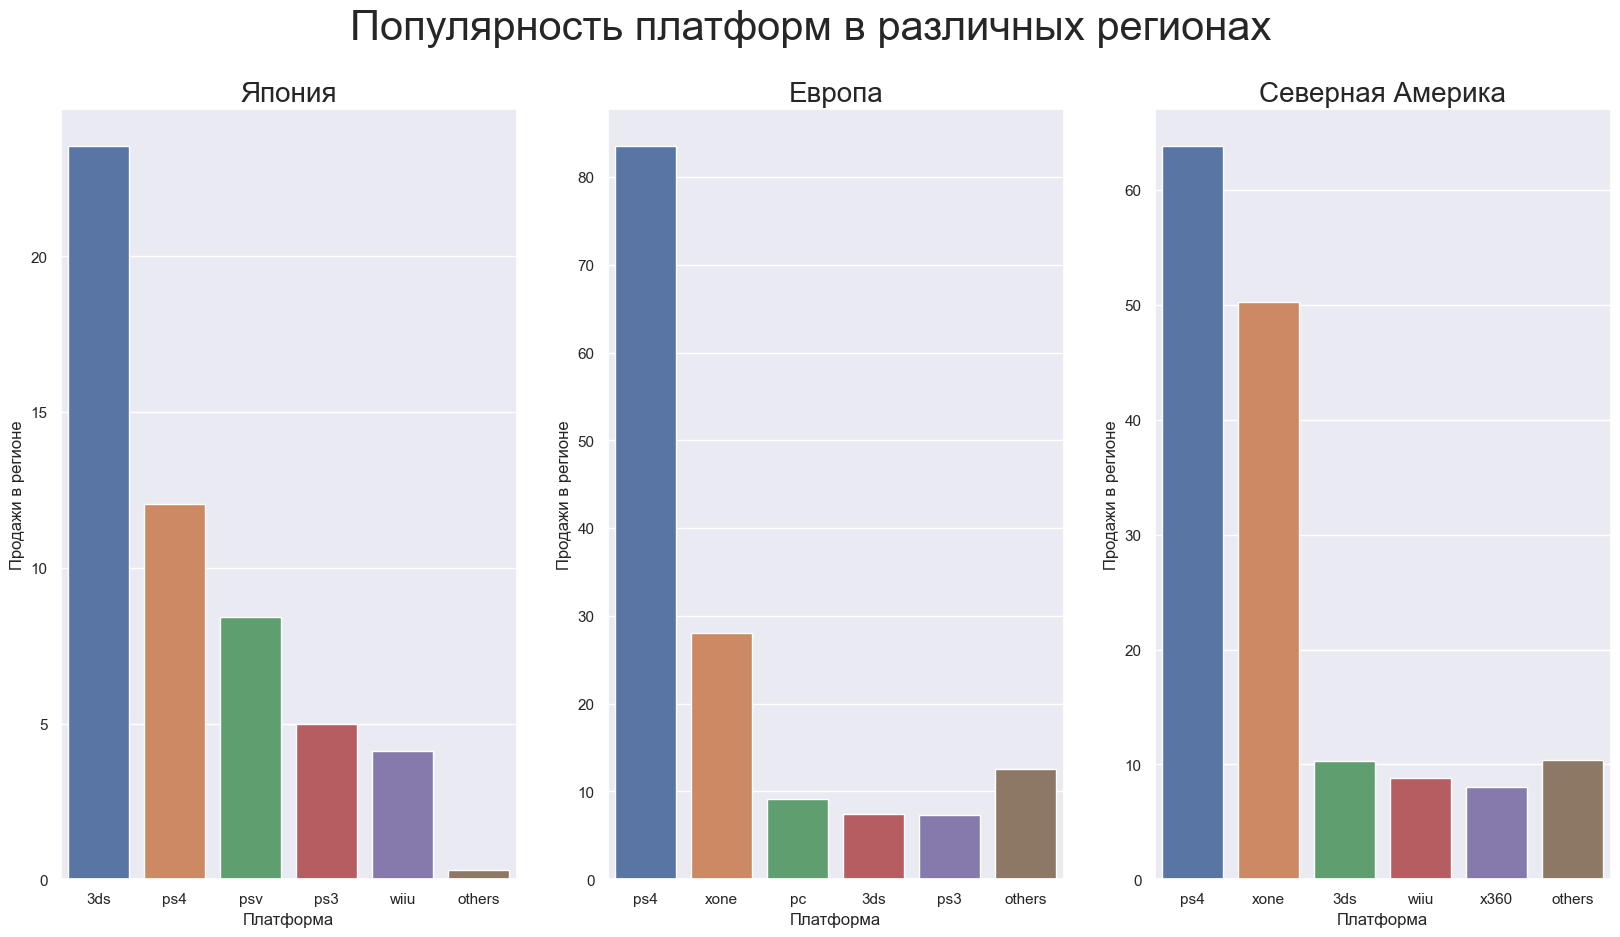

In [53]:
graph_top_five ('platform',
               x_name='Платформа', 
               y_name='Продажи в регионе',
               all_title='Популярность платформ в различных регионах',
               add_others=True)

Различия между Японией и другими регионами заметны и тут. В топе у японцев - несколько портативных консолей, что довольно необычно для Европейского и Американского рынков. А вот Европейский и Американский регионы опять похожи - PS4 лидирует, XOne на втором месте (но в Америке её любят больше), у европейцев популярен PC, американцы препочитают WiiU. 3ds на обоих рынках тоже нашел свое место.

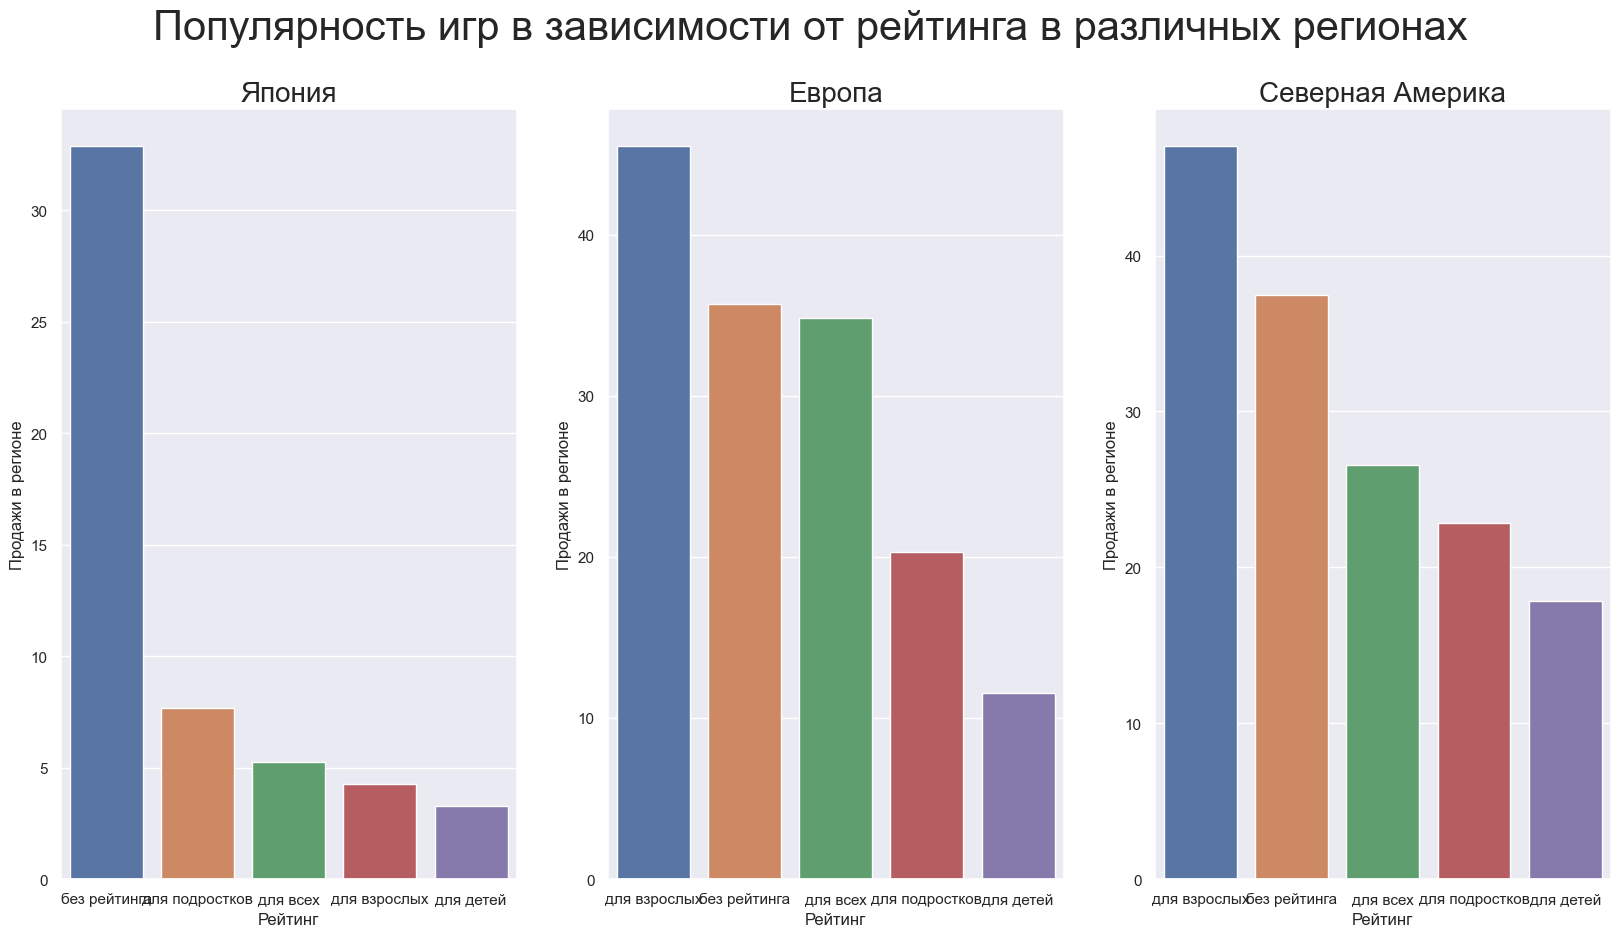

In [54]:
graph_top_five ('rating',
               x_name='Рейтинг', 
               y_name='Продажи в регионе',
               all_title='Популярность игр в зависимости от рейтинга в различных регионах',
               add_others=False)

Отметим, что в Японии большинство продаваемых игр не имеют рейтинга, а из оставшихся лидируют игры для подростков, а игры для взрослых не очень популярны (возможно, они просто не пользуюся принятой в Европе и Америке шкалой).
Для Европы и Америки картина опять схожая - самые популярные игры для взрослых, а игры для подростков и детей менее популярны. 

#  [Гипотезы и проверка](#back)
<a id='hypothesis'></a>

В обоих случаях мы сравниваем не зависящие друг от друга совокупности, а значит будем применять метод scipy.stats.ttest_ind(). Пороговое значение выберем в 1%.

#### Гипотеза 1: 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Выдвенем нулевую и альтернативную гипотезы:


Нулевая: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

α=1%

In [55]:
#поставим ограничение, тк XOne вышел только в 2013 году
df_user_score_13 = df_user_score.loc[df_user_score['year_of_release'] >= 2013] 

xone = df_user_score_13.query('platform == "xone"')['user_score']
pc = df_user_score_13.query('platform == "pc"')['user_score']

alpha = .01

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16174359801784316
Не получилось отвергнуть нулевую гипотезу


In [56]:
xone_and_pc = df_user_score_13.query('platform == "xone" or platform == "pc"')
xone_and_pc.pivot_table(index='platform', 
                        values='user_score', 
                        aggfunc='mean')

,user_score
platform,
pc,6.280380
xone,6.521429


Необходимо принять гипотезу с точки зрения статистики - средние пользовательские рейтинги для XOne и PC равны. Из-за небольшого размера выборки можно расчитать среднее и сравнить в ручную - действительно выборки похожи, хоть и немного различаются. Т.к значение p-value больше 10%, то нулевую гипотезу точно не нужно отвергать, учитывая, что общепринятые пороговые значения — 5% и 1%.

#### Гипотеза 2: 
Средние пользовательские рейтинги жанров Action и Sports разные.
Выдвенем нулевую и альтернативную гипотезы:


Нулевая: Средние пользовательские рейтинги жанров Action и Sports одинкаовые.

Альтернативная: Средние пользовательские рейтинги жанров Action и Sports разные.

α=1%

In [57]:
#данные будем брать за акутальный период
df_user_score_10 = df_user_score.loc[df_user_score['year_of_release'] >= 2010] 


action = df_user_score_10.query('genre == "action"')['user_score']
sports = df_user_score_10.query('genre == "sports"')['user_score']

alpha = .01

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.704356296291214e-16
Отвергаем нулевую гипотезу


In [58]:
action_and_sports_10 = df_user_score.query('genre == "action" or genre == "sports"')
action_and_sports_10.pivot_table(index='genre', 
                              values='user_score', 
                              aggfunc='mean')

,user_score
genre,
action,7.056484
sports,6.956375


Удалось опровергнуть нулевую гипотезу, значит средние пользовательские рейтинги жанров Action и Sports отличаются. Принимаем альтернативную гипотезу. При расчете среднего вручную видим, что значени я отличаются.
Т.к значение p-value сильно меньше 1%, то нулевую гипотезу точно не нужно отвергать, учитывая, что общепринятые пороговые значения — 5% и 1%.

In [59]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


#  [Выводы](#back)
<a id='end'></a>

Было проведено исследование базы данных, содержашей информацию о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

Во время изучения были сформулированы следующие закономерности:
- каждая платформа имеет "время жизни" - около 7 лет актуальности, пик которой достигает примерно через 3 года после выпуска платформы. В этот момент продажи игр на эту платформу максимальные, затем они начинают падать.
- примерно раз в 7 лет происходит ротация и выходит новое поколение платформы, заменяющее собою старое.
- некоторые платформы, выпущенные уже давно и не слишком актуальные сейчас все ещё держатся в лидерах по продажам игр (например PS, PS2 и DS).
- в целом продажи платформерных игр находятся на спаде по сравнению с 07-11 годами. Скорее всего это связано с появлением и развитием большого рынка мобильных игр.
- в 2016 году самые высокие продажи в мире имела платформа PS4, затем шли WiiU, 3DS и XboxOne. Только 3DS демонстрировал рост продаж, тогда как продажи игр остальных платформ падали.
- теряющими актуальность в 2016 году были PS3, PSV, PC, Wii и Xbox360. В сравнении с прошлыми годами, PSV демонстрировала наименьшее падение, но число продаж игр этой платформы находится на самом низком уровне из всех. 
- самые актуальными платформами можно считать PS4, XOne и 3DS.
- заметно, что большинство игр не приносят огромных продаж, но есть и такие, которые во много раз популярнее "среднячков".
- оценки пользователей и критиков слабо влияют на продажи игр, однако люди все-таки активнее прислушиваются к мнению критиков, чем других пользователей.
- самыми популярными жанрами во всем мире являются Action, Sports, Shooter, RPG, а наименее популярные - стратегии, приключения и паззлы. При этом важная региональная специфика, о ней подробнее скажем ниже

Для разных регионов наблюдается своя специфика, отметим интересные закономерности:

В Японии наблюдаются следующие закономерности:
- самые популярные платформы от Nintendo (что актуальные, что на всем промежутке изучения)
- в топе есть и PlayStation (PS и PS2 в общем и PS4 с PSV в актуальном)
- XBox не пользуется широкой популярностью
- популярны портативные платформы (PSV, 3DS, DS)
- самый популярные жанры - Role-Playing и Action
- шутеры, спорт и гонки не так популярны, как в общих продажах
- большинство продаваемых игр не имеют рейтинга, а из оставшихся лидируют игры для подростков, а игры для взрослых не очень популярны (возможно, они просто не пользуюся принятой в Европе и Америке шкалой)

В Европе наблюдаются следующие закономерности:
- самые популярные платформы от PlayStation
- в топе есть Xbox360 и Wii 
- Nintendo не пользуется большой популярностью, как в Японии
- самый популярный жанры - Action, Shooter, Sports
- ролевые игры не так популярны, как в Японии
- самые популярные игры для взрослых, игры для подростков и детей менее популярны

В Северной Америке наблюдаются следующие закономерности:
- среди самых популярных платформ - Xbox, PlayStation, Wii (как в общем, так и для актуальных, с поправкой на поколение платформы)
- XOne гораздо популярнее в Америке, чем в Европе
- отличия от Европы сильно меньше, чем от Японии 
- самый популярный жанры - как в Европе
- игры для взрослых очень популярны. Популярность остальных чуть ниже
- как и в Европе - самые популярные игры для взрослых, игры для подростков и детей менее популярны



Были проверены гипотезы о схожести среднего рейтинга для XOne и PC и различии средних пользовательских рейтингов жанров Action и Sports. Было показано, что средний рейтинг платформ схожий, а средний рейтинг жанров Action и Sports различается. Таким образом обе гипотезы имеют смысл. 